In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../dataset/trans_1.csv")
df2 = pd.read_csv("../dataset/trans_2.csv")

df["date"] = pd.to_datetime(df["date"])
df2["date"] = pd.to_datetime(df2["date"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["dow"] = df["date"].dt.day_of_week
df["hour"] = df["date"].dt.hour
df["minute"] = df["date"].dt.minute

df2["year"] = df2["date"].dt.year
df2["month"] = df2["date"].dt.month
df2["day"] = df2["date"].dt.day
df2["dow"] = df2["date"].dt.day_of_week
df2["hour"] = df2["date"].dt.hour
df2["minute"] = df2["date"].dt.minute

columns = ["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"]
time_columns = ["year", "month", "day", "dow", "hour", "minute"]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69680 entries, 0 to 69679
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    69680 non-null  datetime64[ns]
 1   HUFL    69680 non-null  float64       
 2   HULL    69680 non-null  float64       
 3   MUFL    69680 non-null  float64       
 4   MULL    69680 non-null  float64       
 5   LUFL    69680 non-null  float64       
 6   LULL    69680 non-null  float64       
 7   OT      69680 non-null  float64       
 8   year    69680 non-null  int32         
 9   month   69680 non-null  int32         
 10  day     69680 non-null  int32         
 11  dow     69680 non-null  int32         
 12  hour    69680 non-null  int32         
 13  minute  69680 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(6)
memory usage: 5.8 MB


In [4]:
df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,year,month,day,dow,hour,minute
0,2018-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2018,7,1,6,0,0
1,2018-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2018,7,1,6,0,15
2,2018-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2018,7,1,6,0,30
3,2018-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2018,7,1,6,0,45
4,2018-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2018,7,1,6,1,0


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69680 entries, 0 to 69679
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    69680 non-null  datetime64[ns]
 1   HUFL    69680 non-null  float64       
 2   HULL    69680 non-null  float64       
 3   MUFL    69680 non-null  float64       
 4   MULL    69680 non-null  float64       
 5   LUFL    69680 non-null  float64       
 6   LULL    69680 non-null  float64       
 7   OT      69680 non-null  float64       
 8   year    69680 non-null  int32         
 9   month   69680 non-null  int32         
 10  day     69680 non-null  int32         
 11  dow     69680 non-null  int32         
 12  hour    69680 non-null  int32         
 13  minute  69680 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(6)
memory usage: 5.8 MB


In [6]:
df2.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,year,month,day,dow,hour,minute
0,2018-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999,2018,7,1,6,0,0
1,2018-07-01 00:15:00,39.622002,11.309,35.543999,8.551,3.209,1.258,38.223000,2018,7,1,6,0,15
2,2018-07-01 00:30:00,38.868000,10.555,34.365002,7.586,4.435,1.258,37.344002,2018,7,1,6,0,30
3,2018-07-01 00:45:00,35.518002,9.214,32.569000,8.712,4.435,1.215,37.124001,2018,7,1,6,0,45
4,2018-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001,2018,7,1,6,1,0


Data is clean

## Data Visualization 

### Dataset trans_1.csv

#### Heatmap

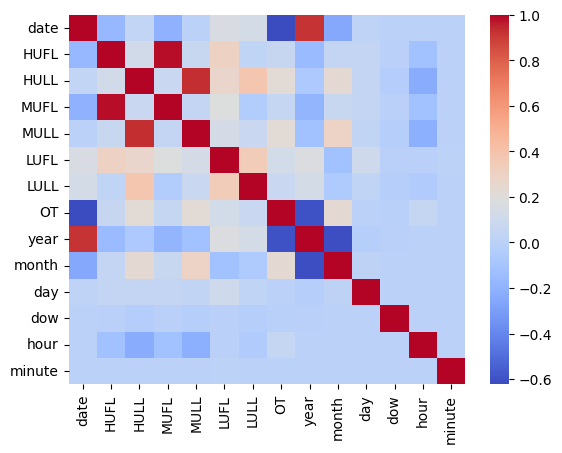

In [7]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

#### Plot each variable over time

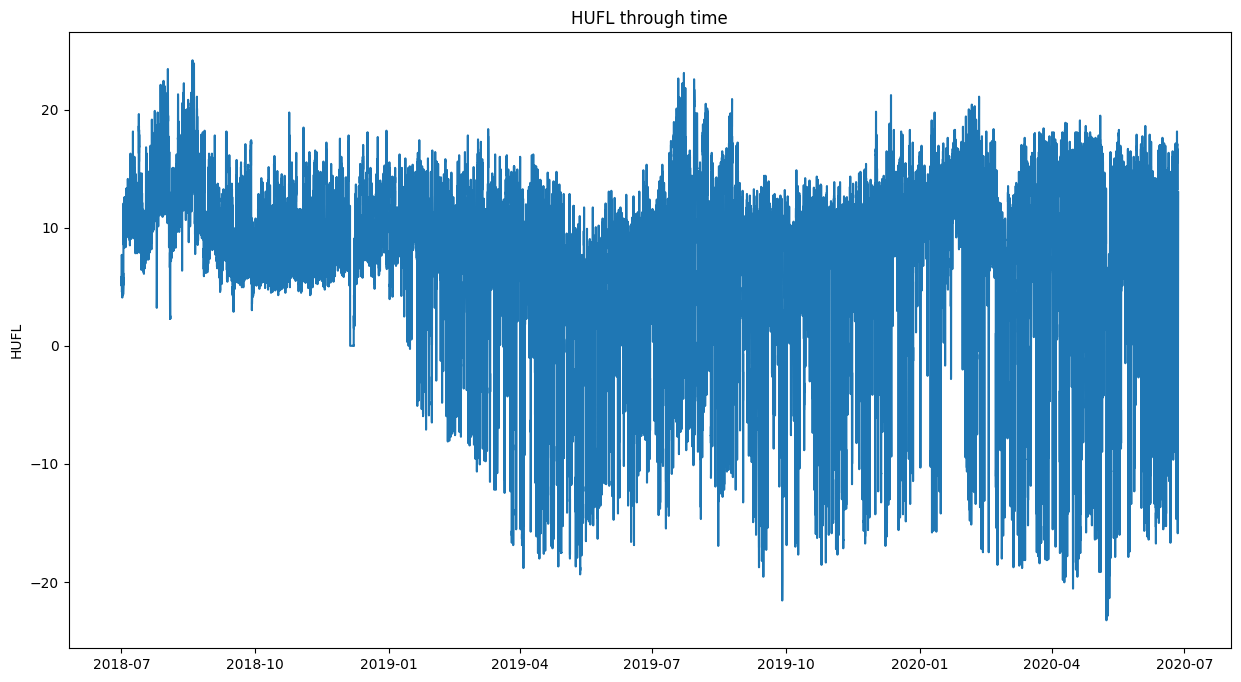

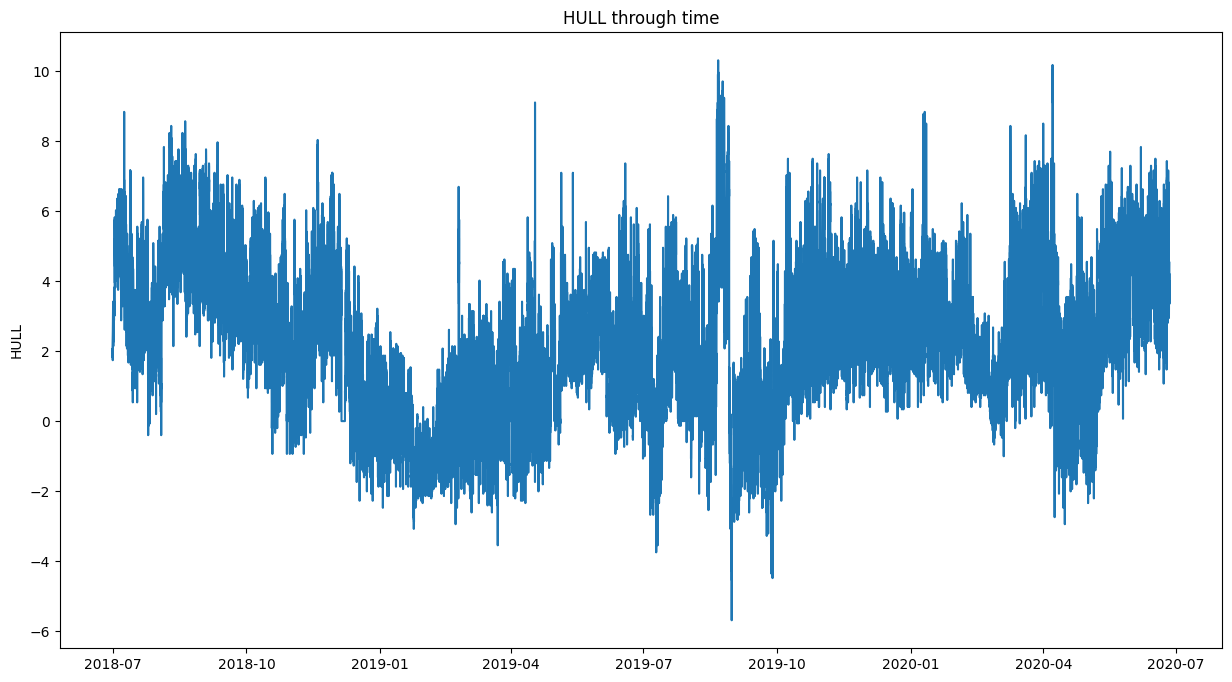

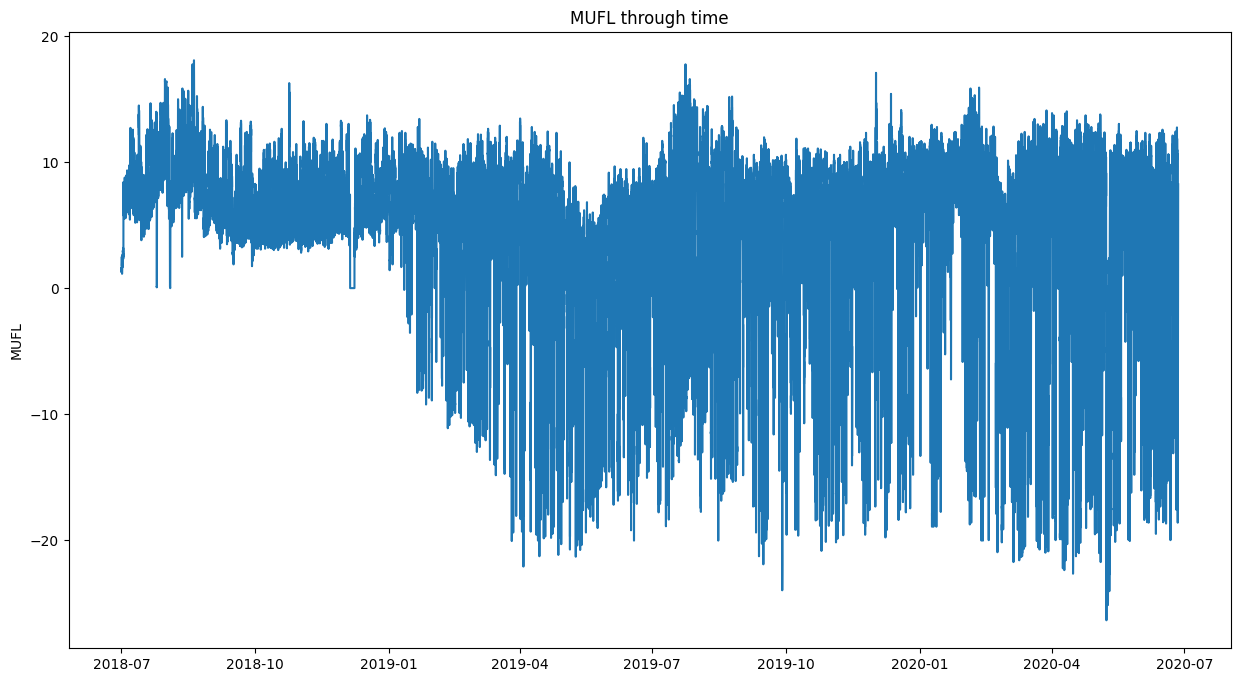

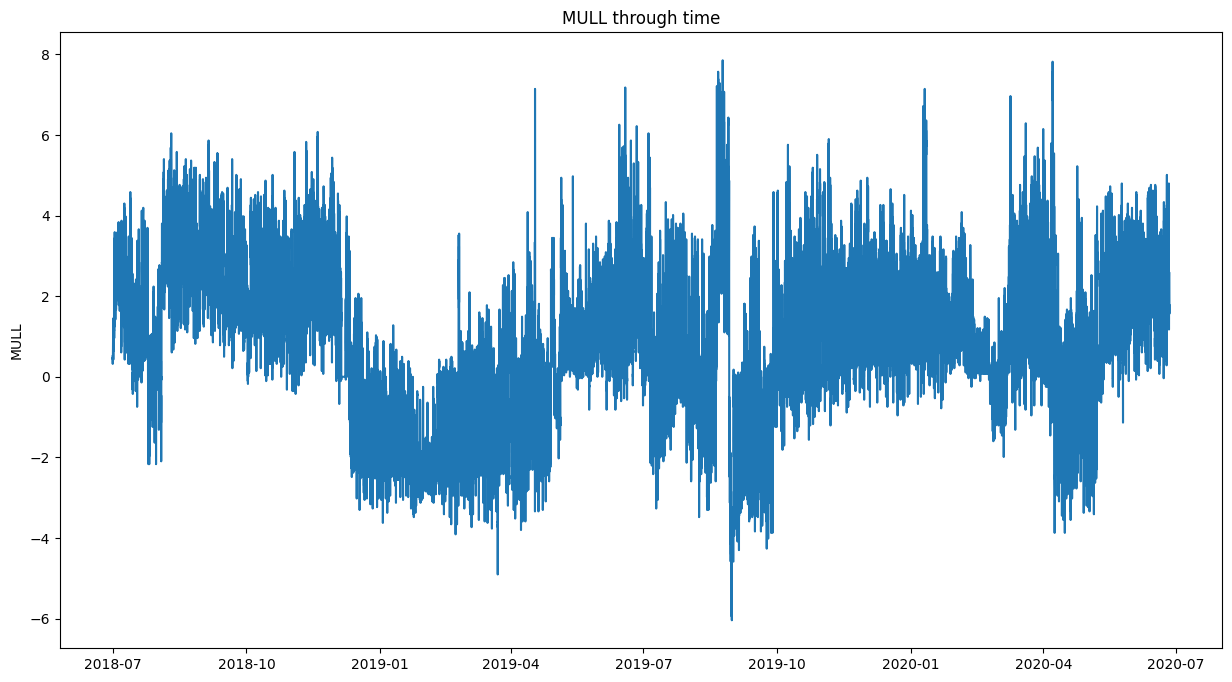

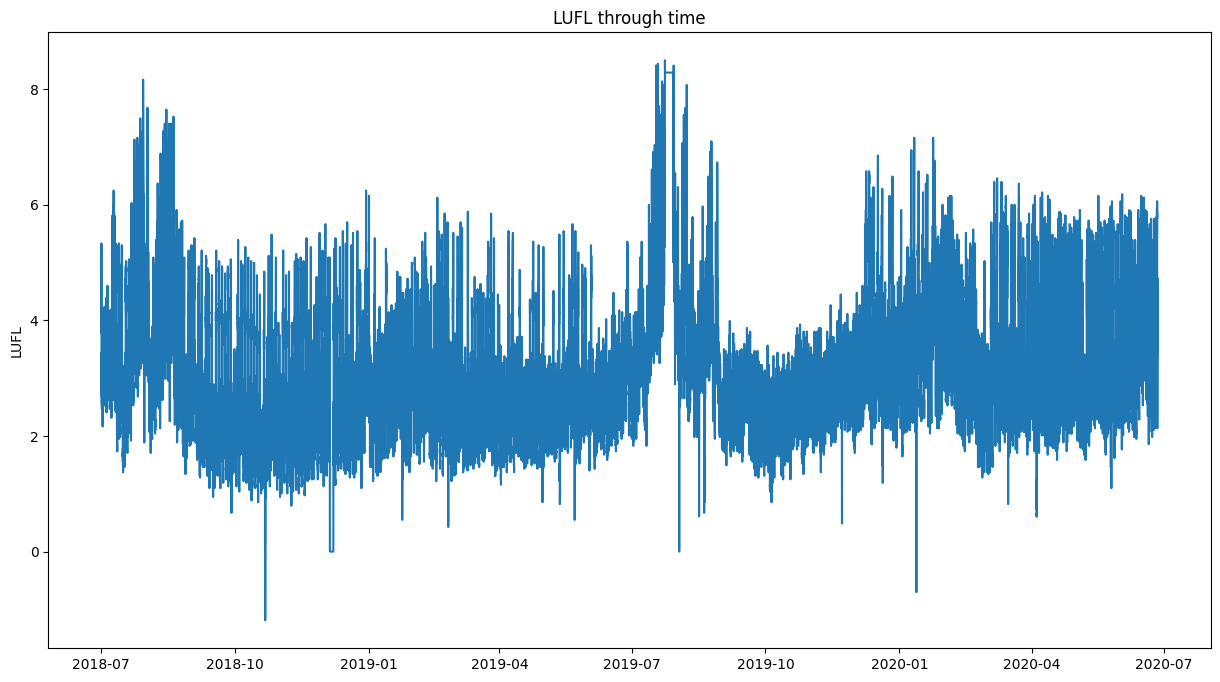

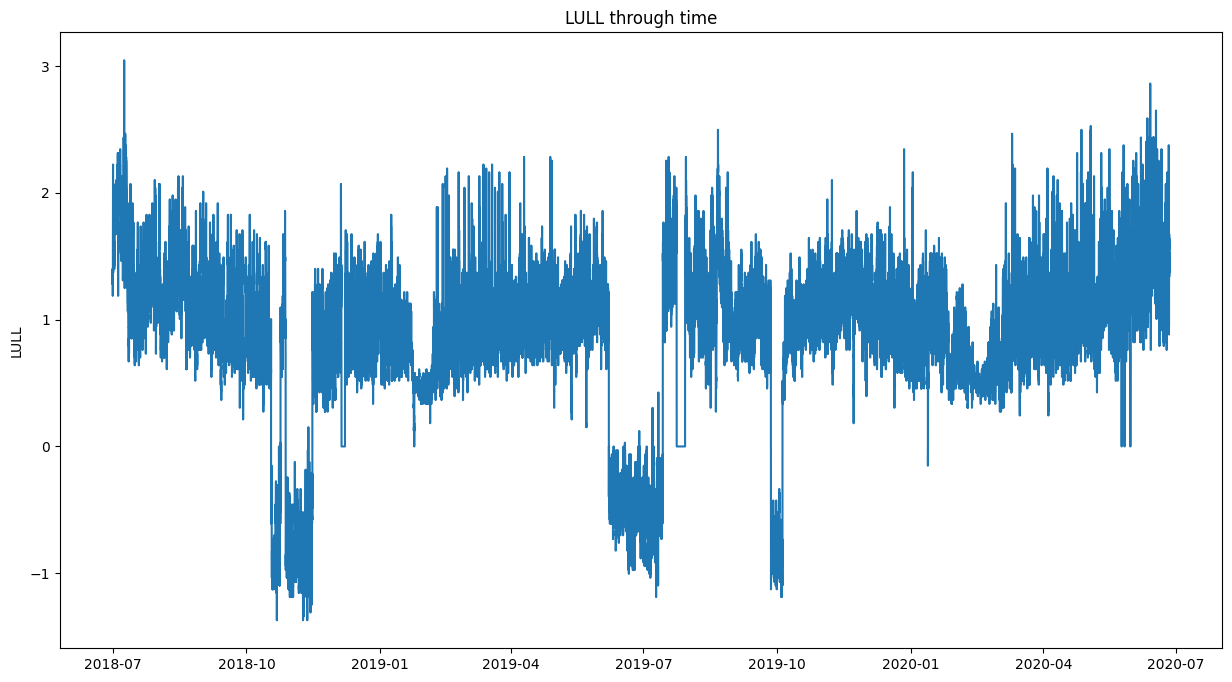

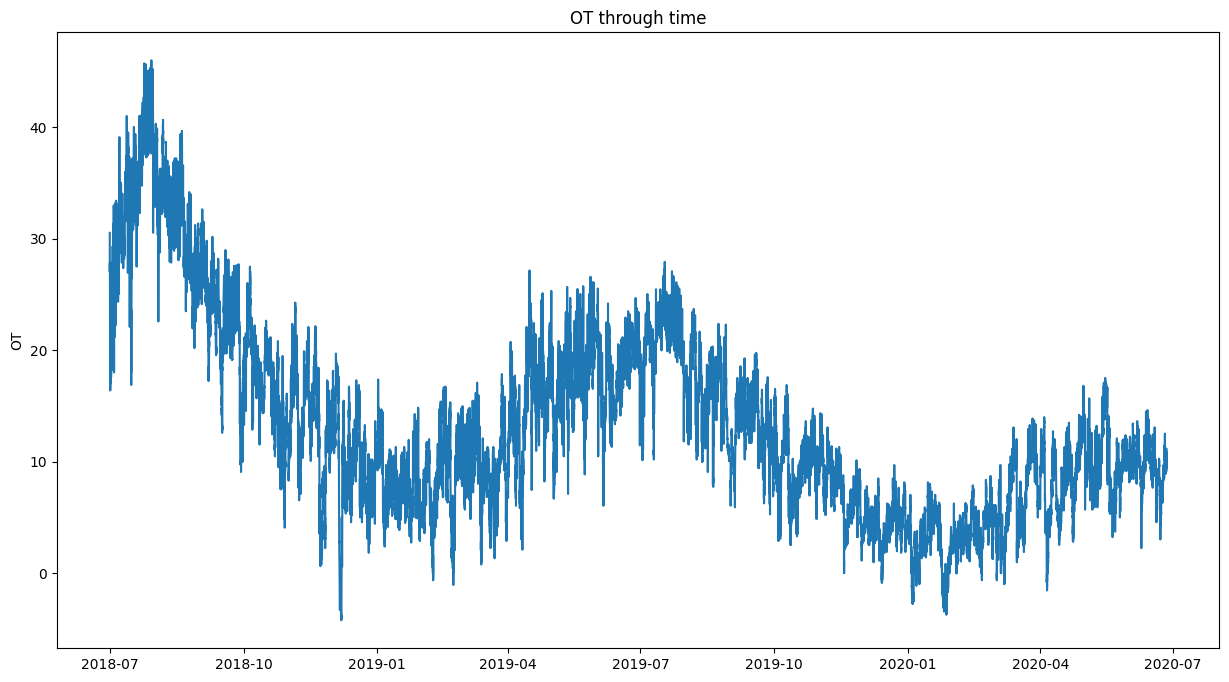

In [8]:
for col in columns:
    plt.figure(figsize=(15, 8))
    plt.plot(df["date"], df[col])
    plt.title(f"{col} through time")
    plt.ylabel(col)
    plt.show()

#### Looking for Seasonality/Trends

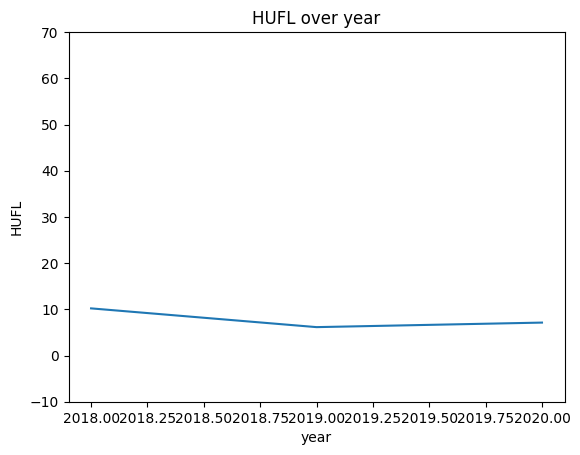

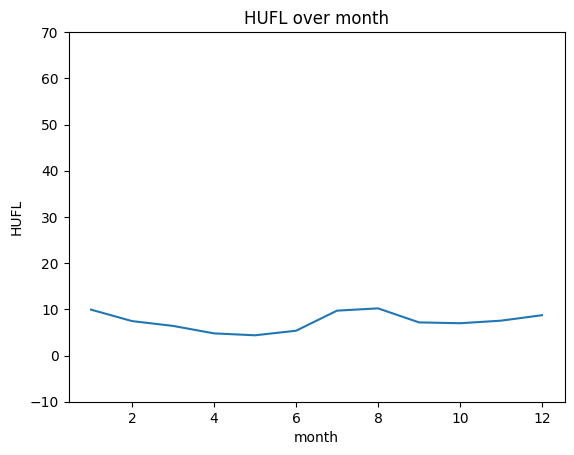

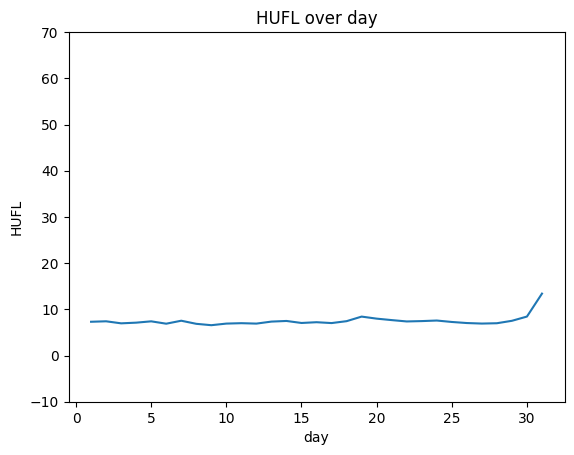

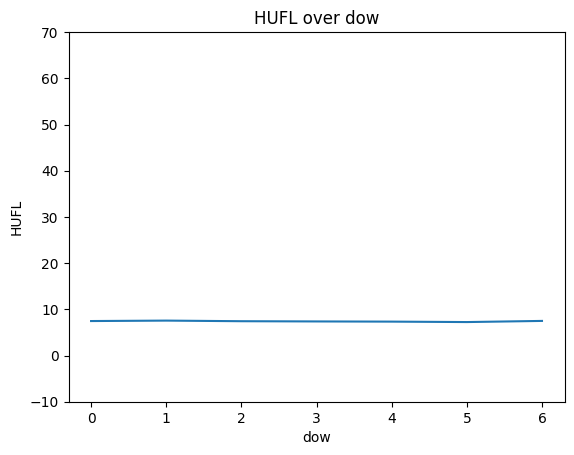

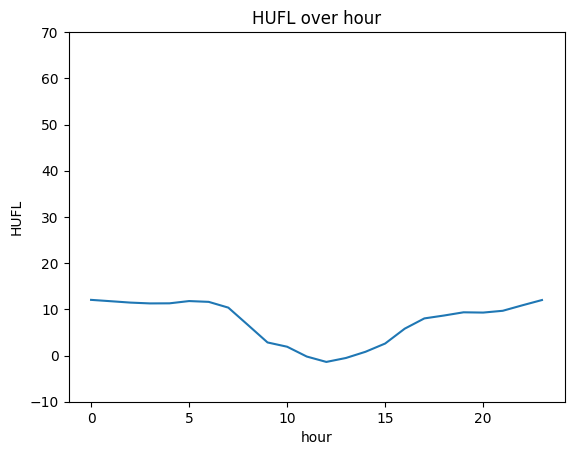

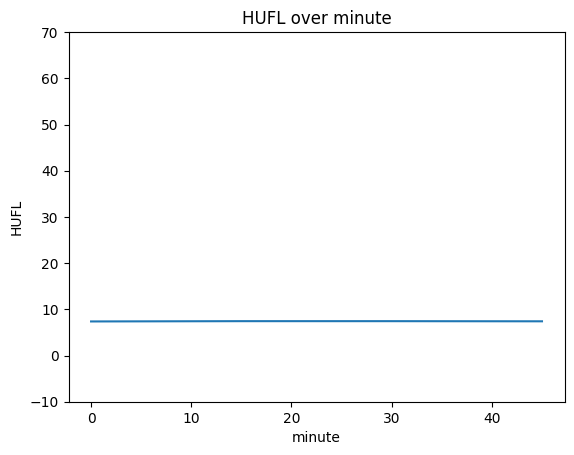

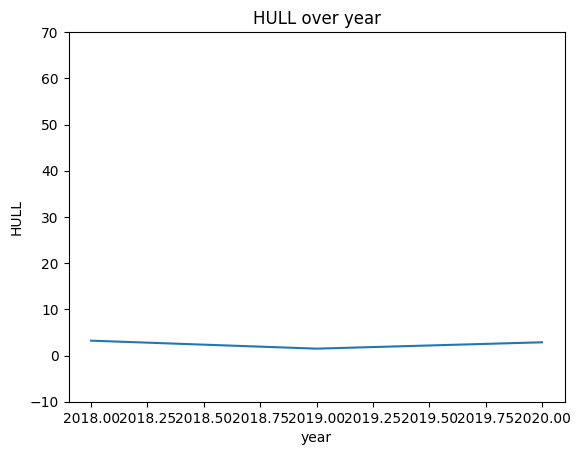

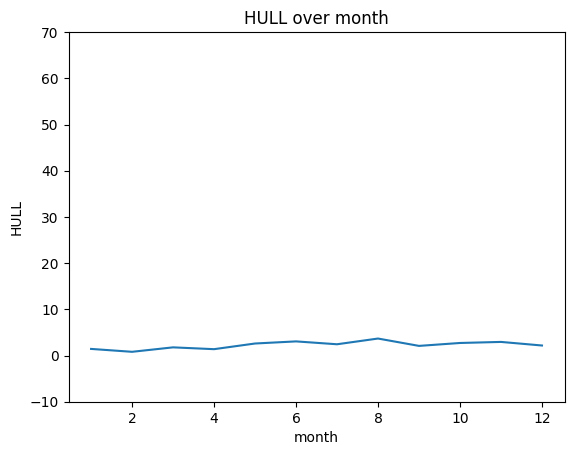

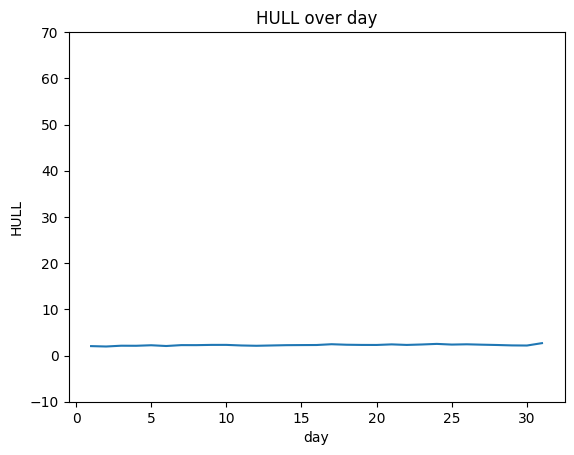

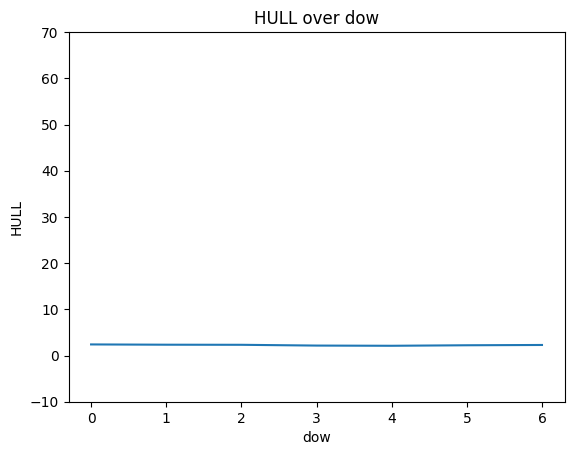

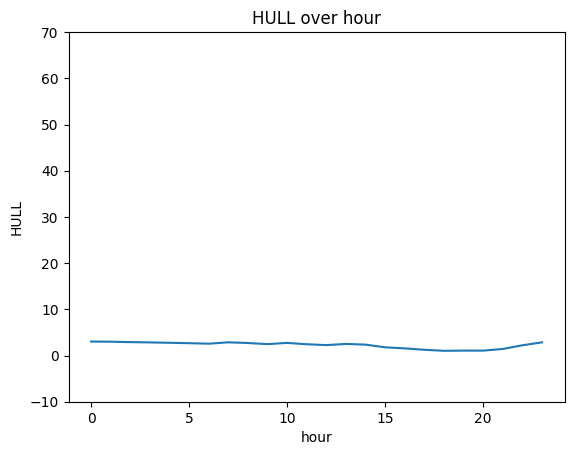

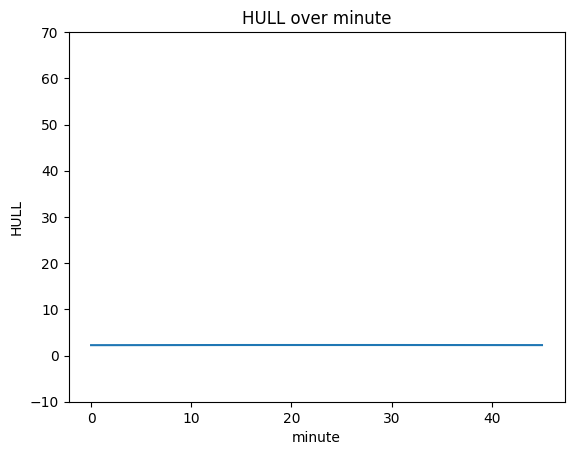

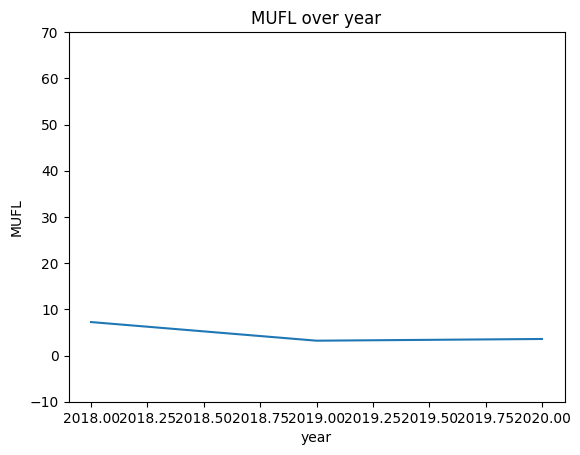

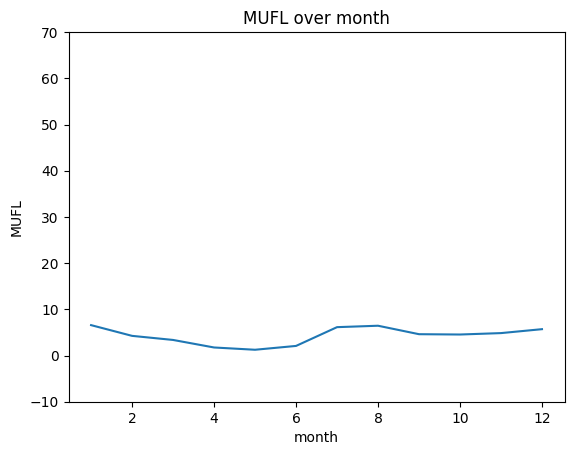

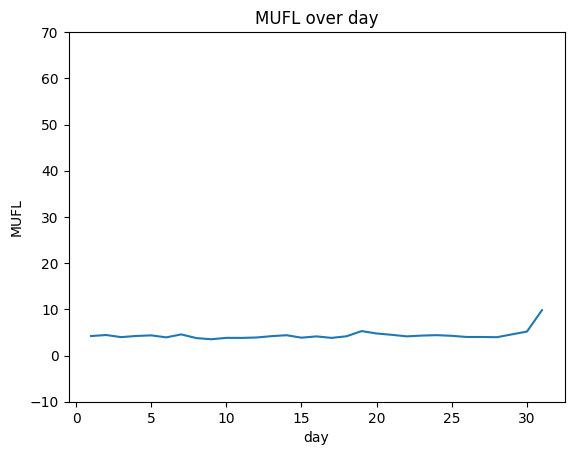

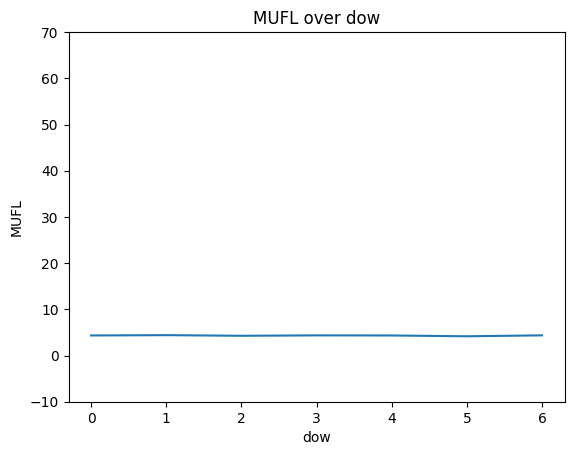

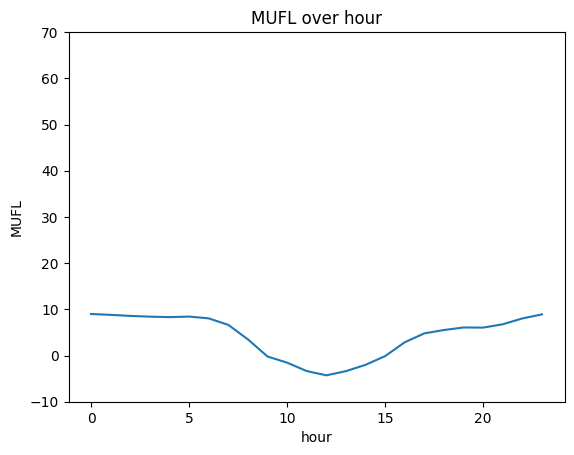

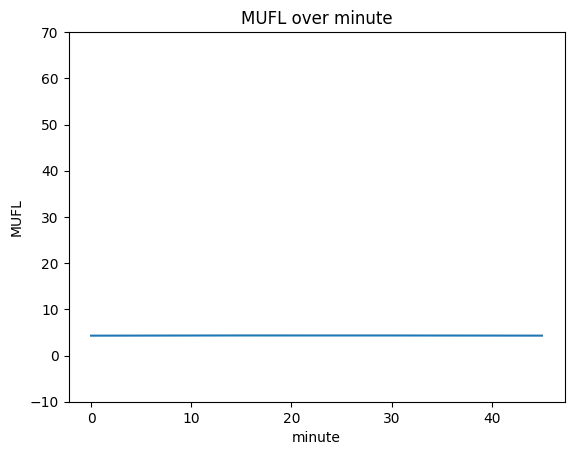

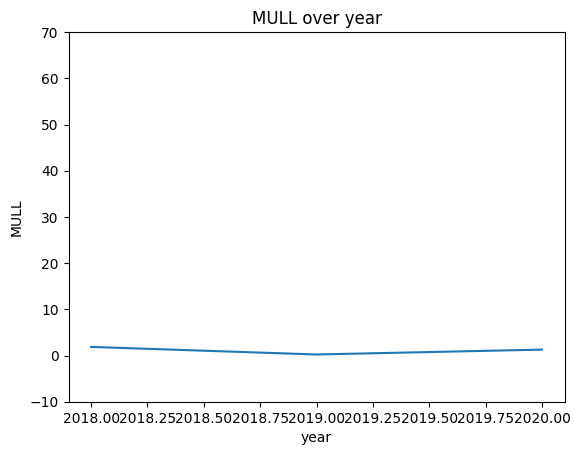

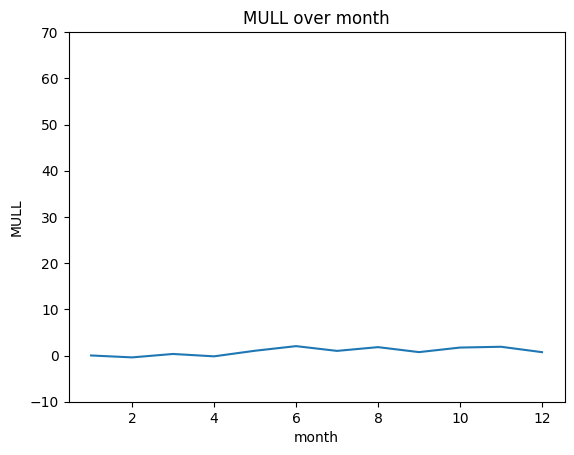

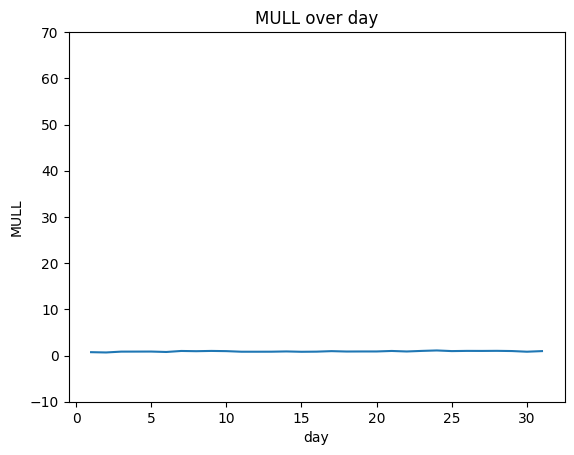

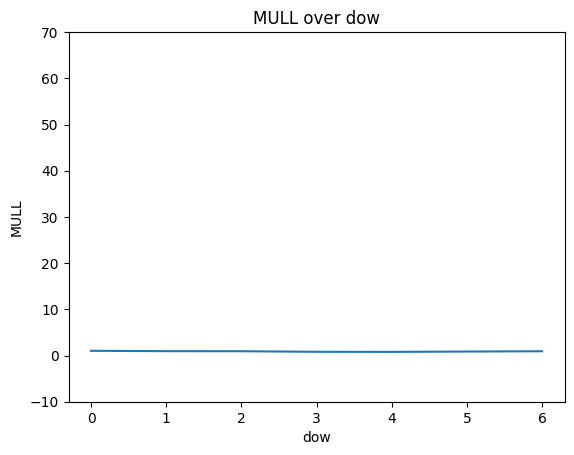

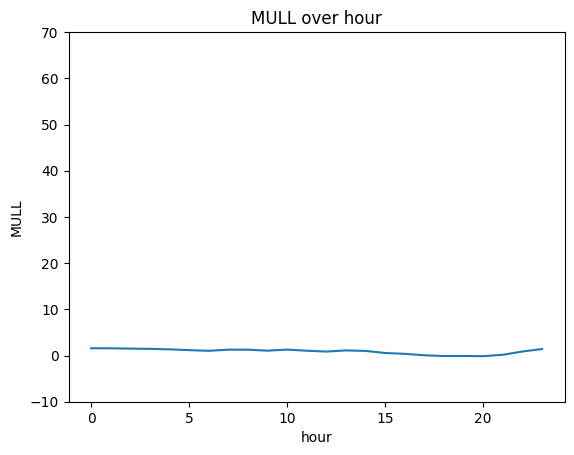

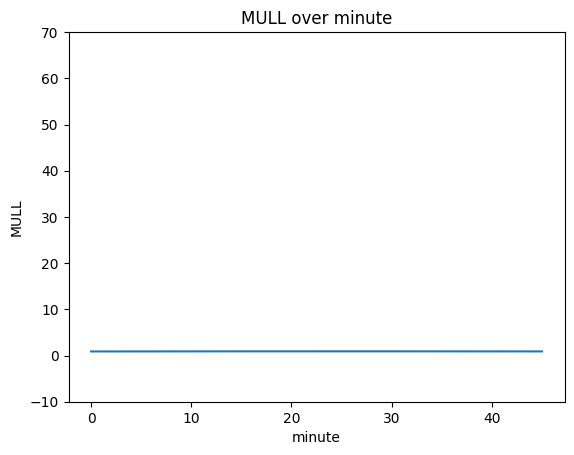

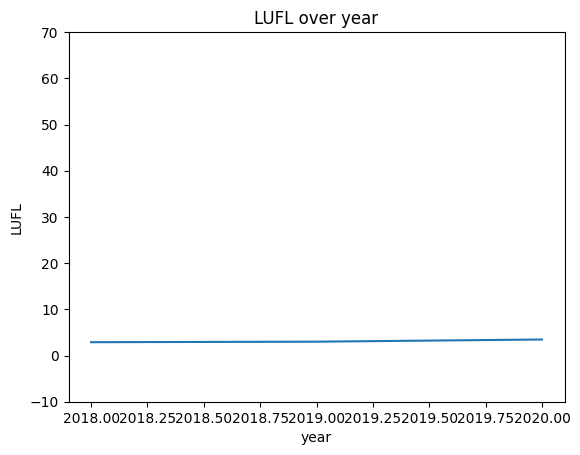

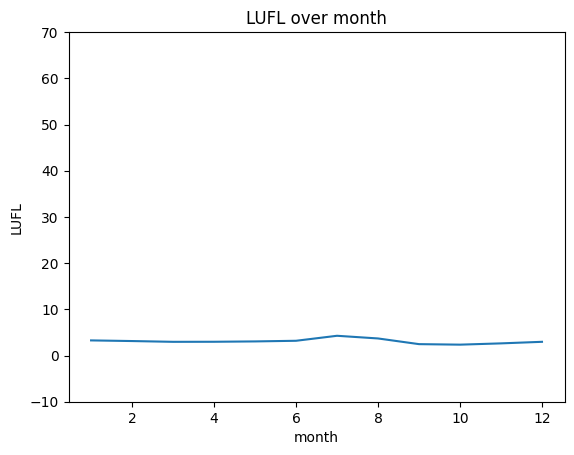

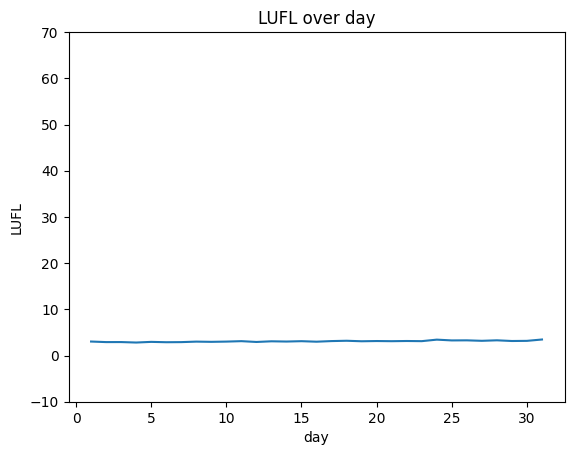

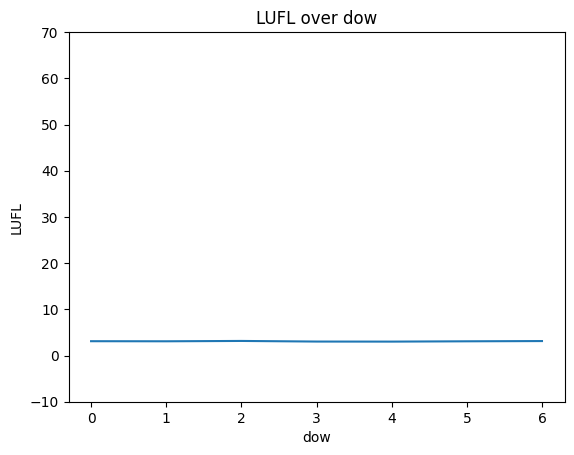

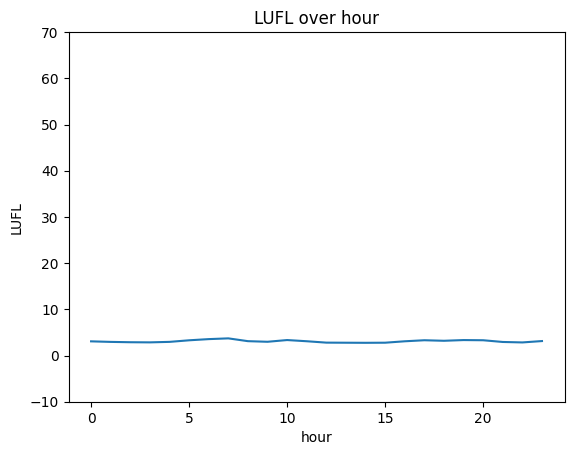

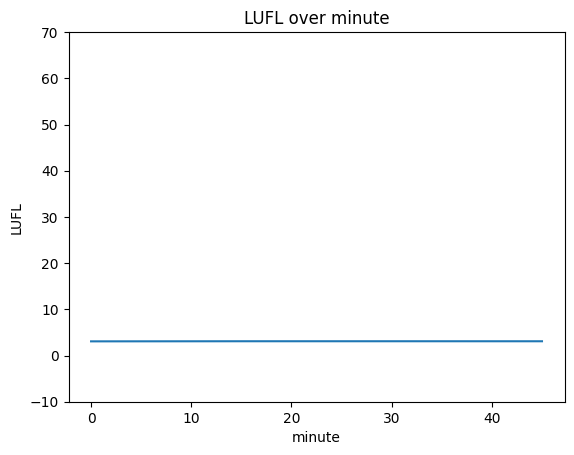

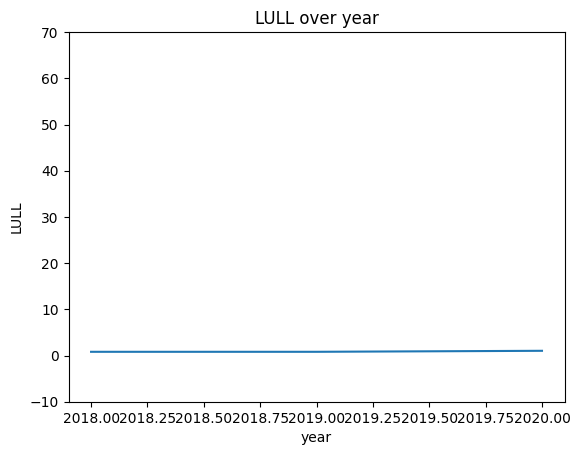

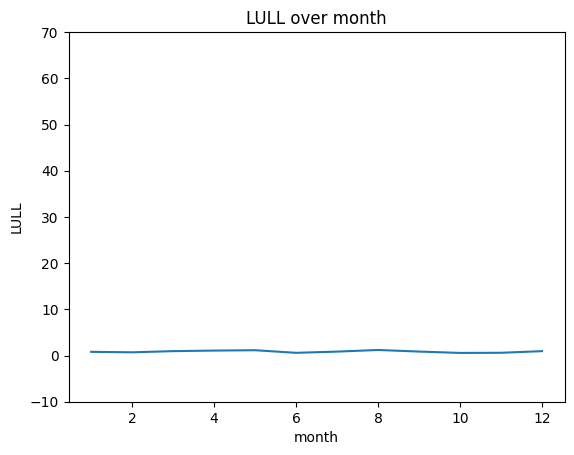

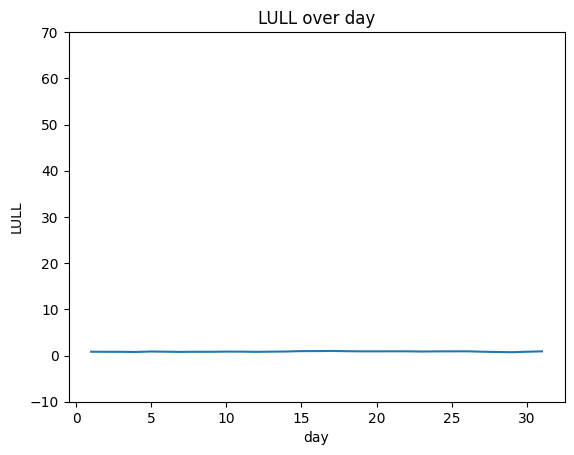

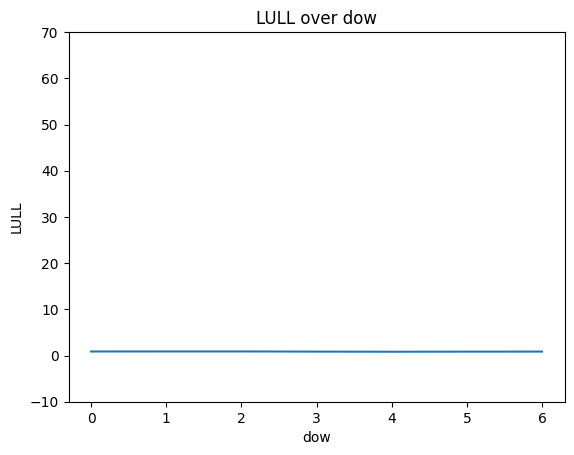

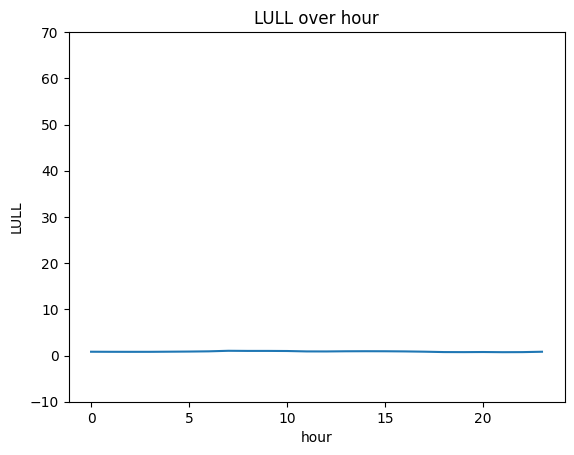

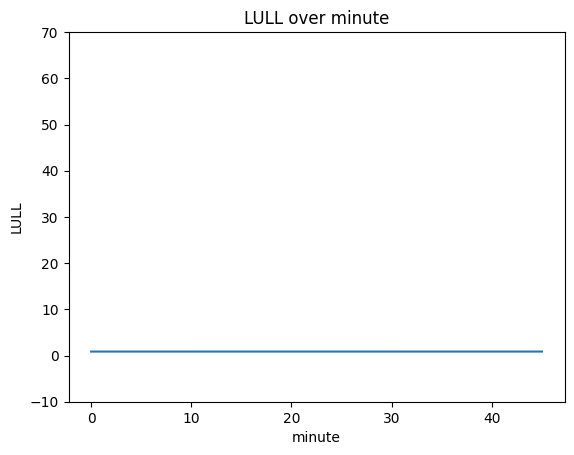

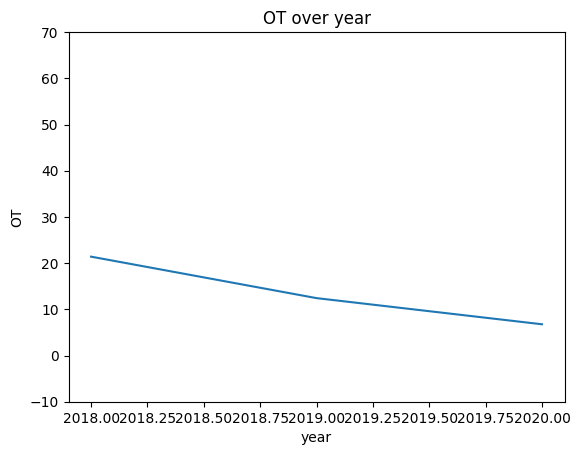

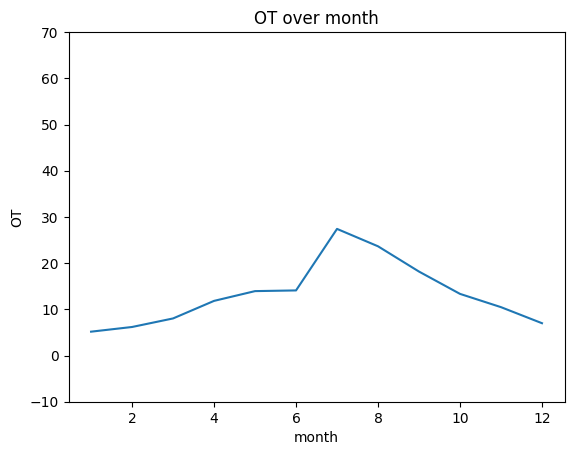

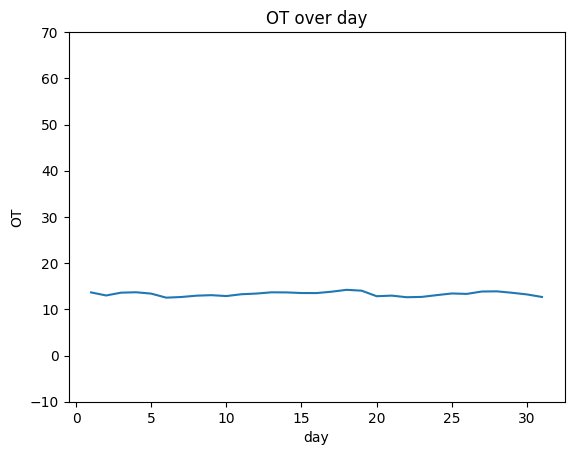

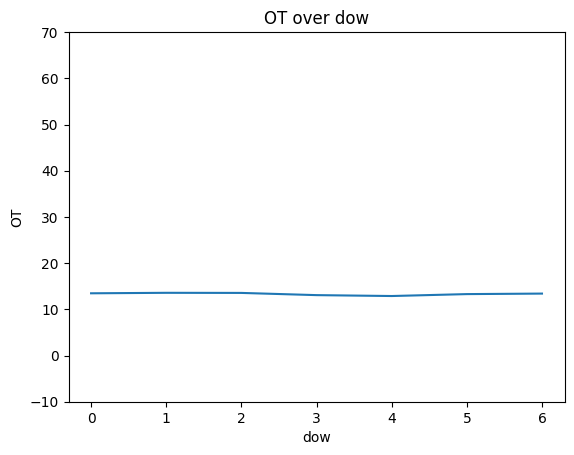

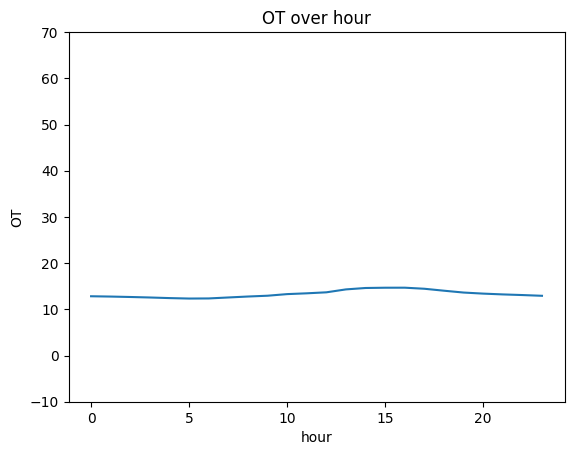

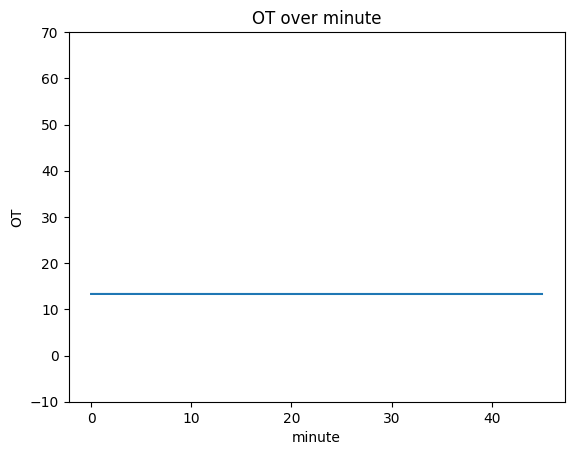

In [9]:
for col in columns:
    for time_col in time_columns:
        df.groupby(time_col)[col].mean().plot(kind="line", ylim=(-10, 70), title=f"{col} over {time_col}", ylabel=col)
        plt.show()

### Dataset trans_2.csv

#### Heatmap

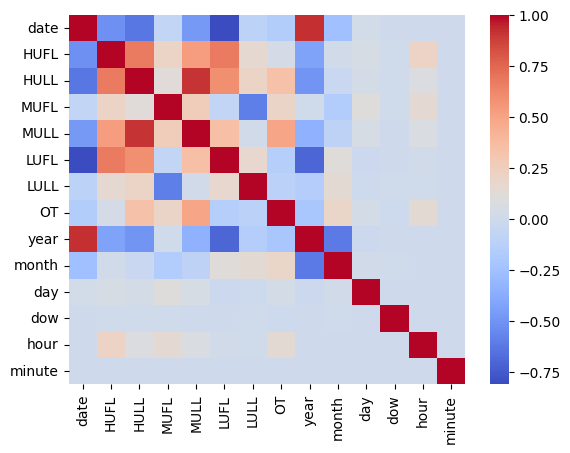

In [10]:
sns.heatmap(df2.corr(), cmap='coolwarm')
plt.show()

#### Plot each variable over time

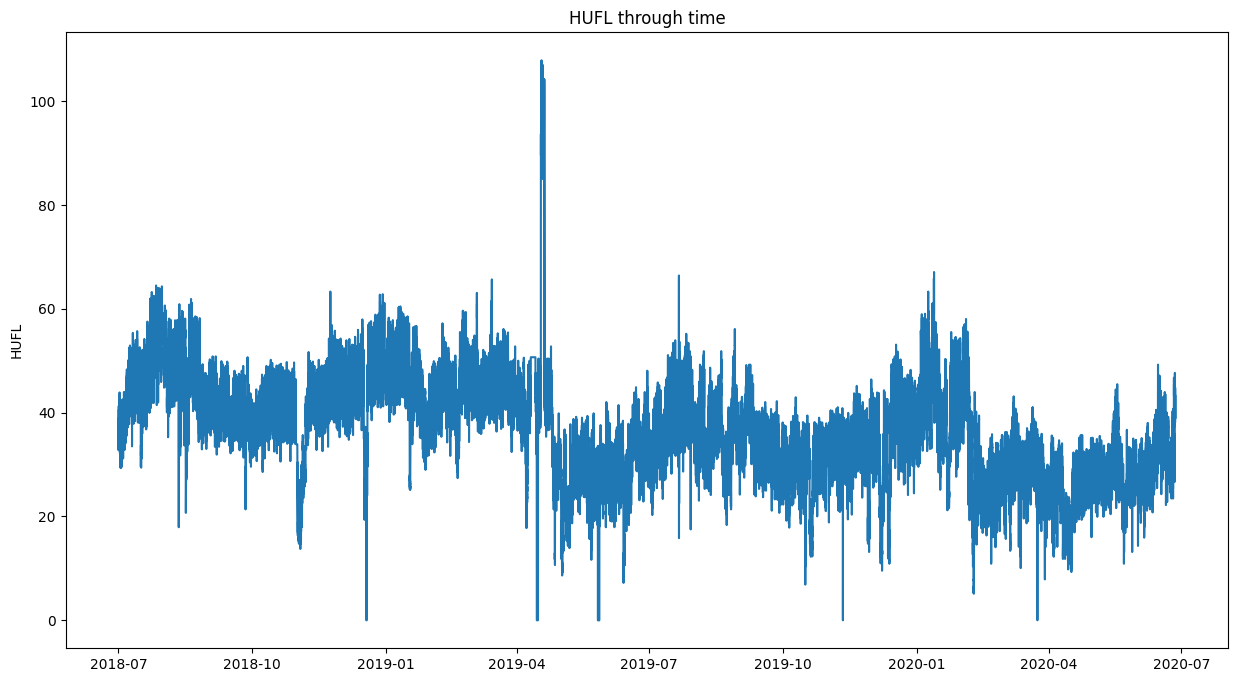

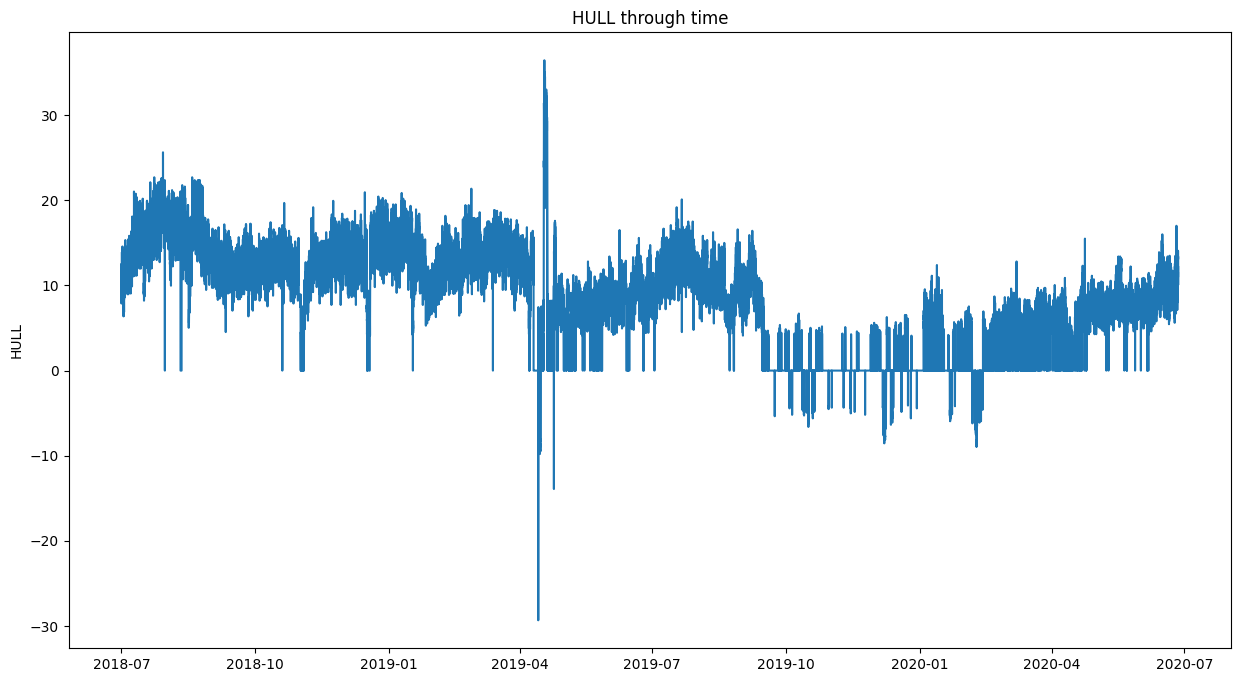

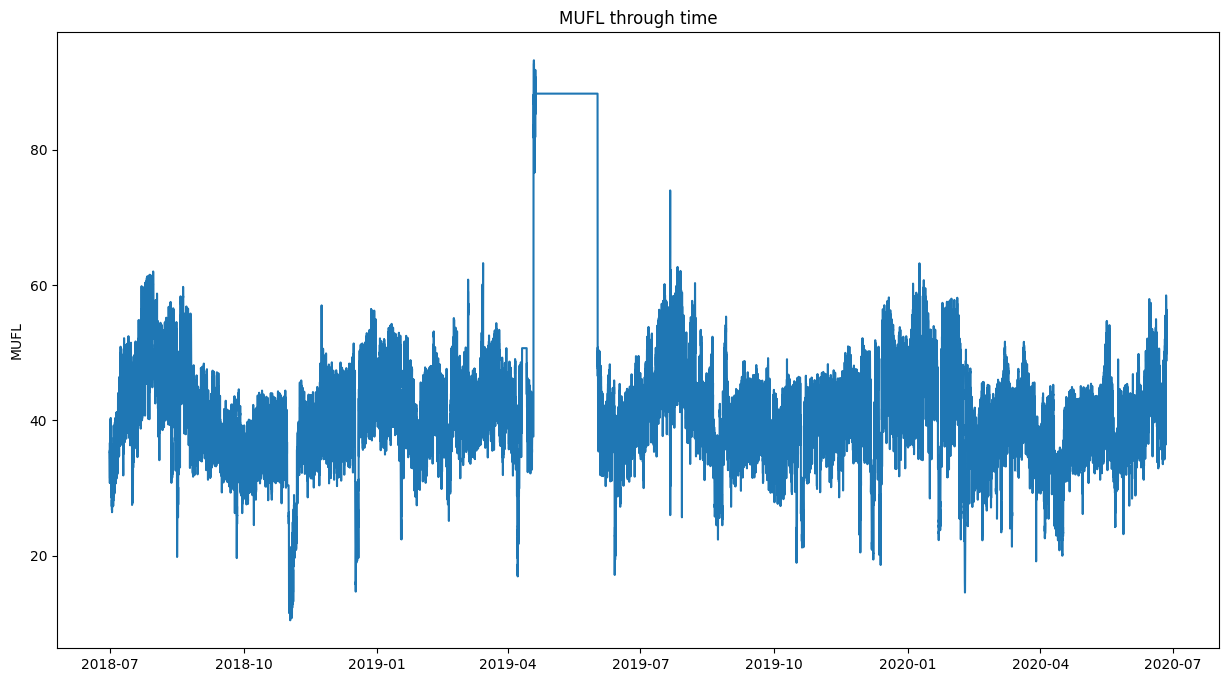

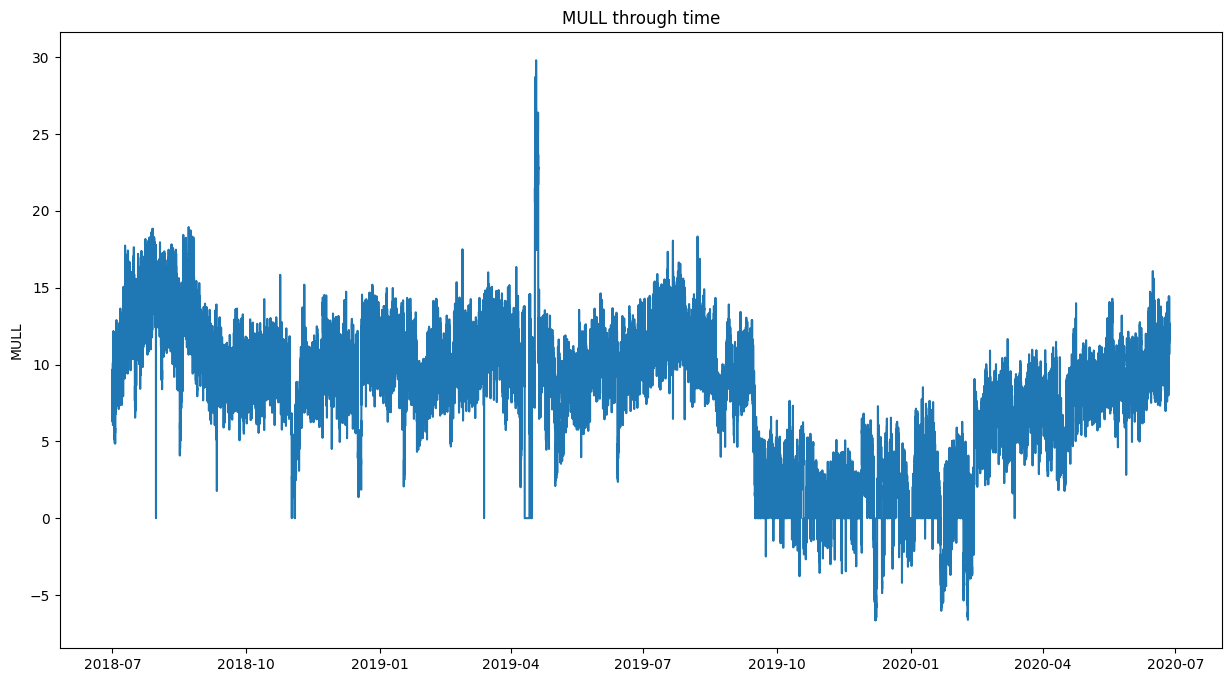

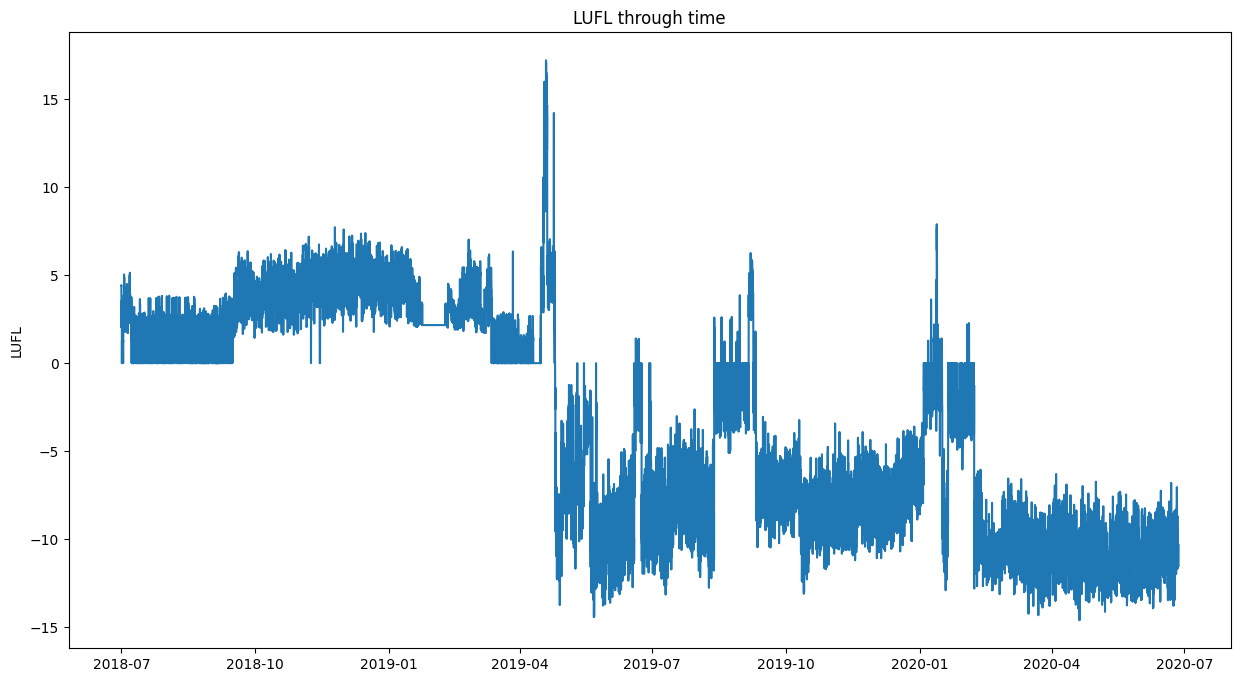

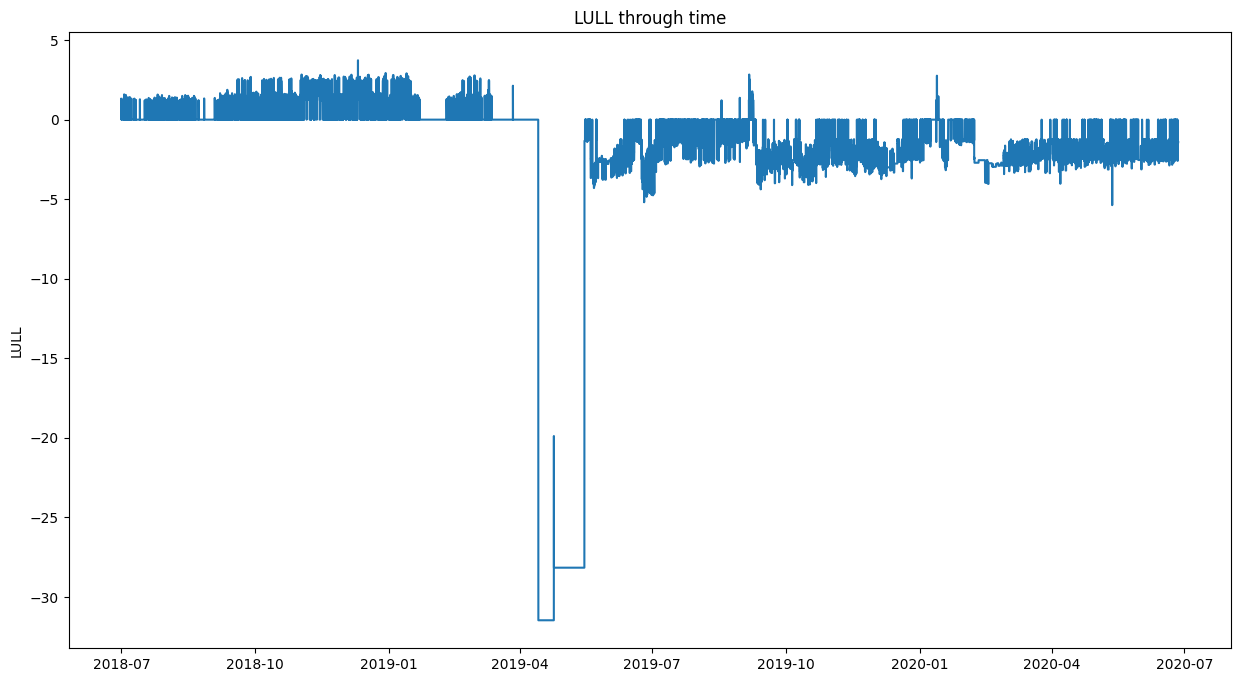

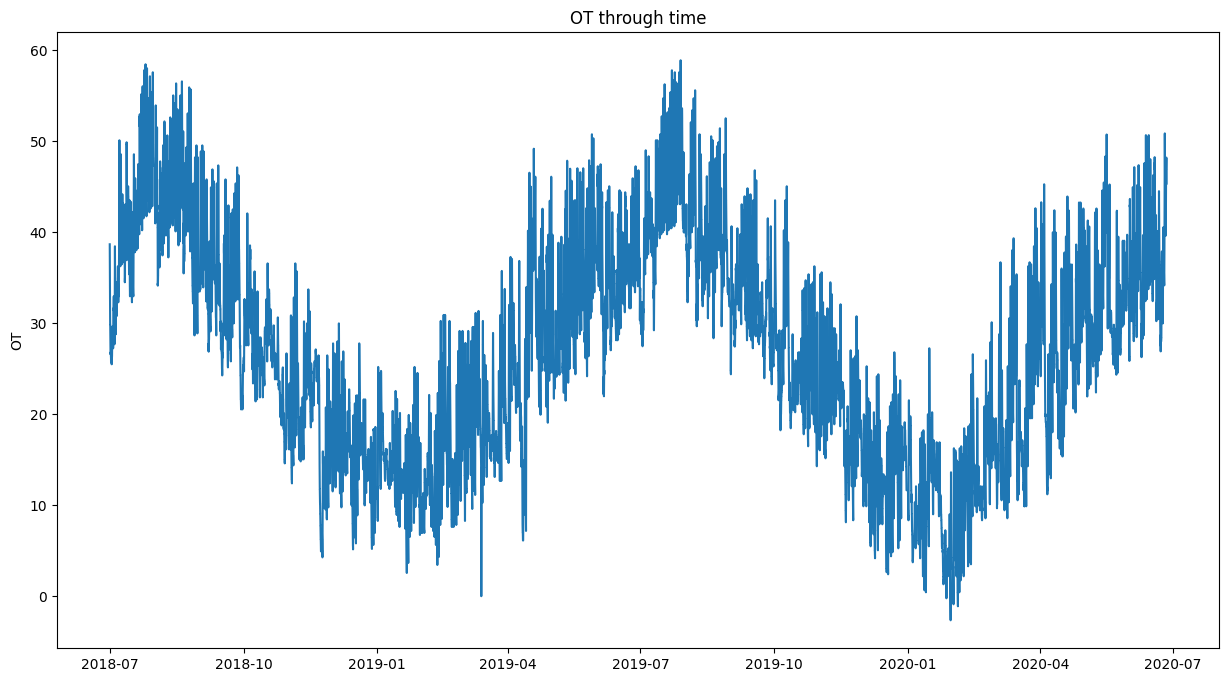

In [11]:
for col in columns:
    plt.figure(figsize=(15, 8))
    plt.plot(df2["date"], df2[col])
    plt.title(f"{col} through time")
    plt.ylabel(col)
    plt.show()

#### Looking for Seasonality/Trends

In [12]:
df2["OT"].max()

np.float64(58.87699890136719)

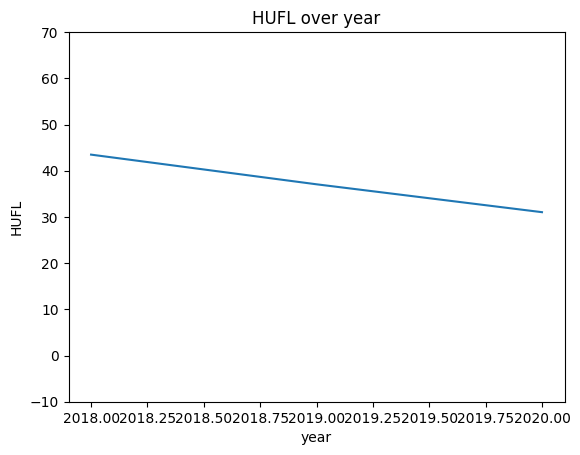

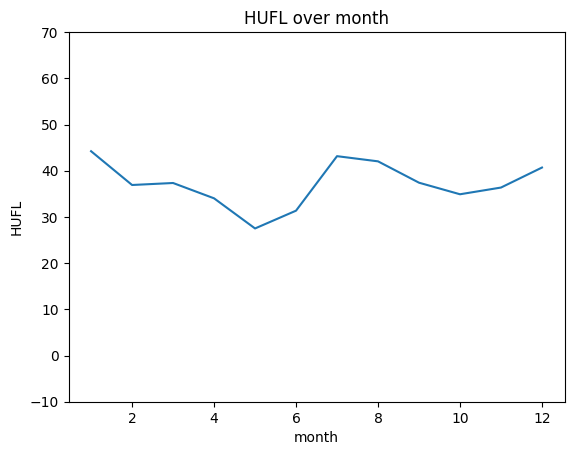

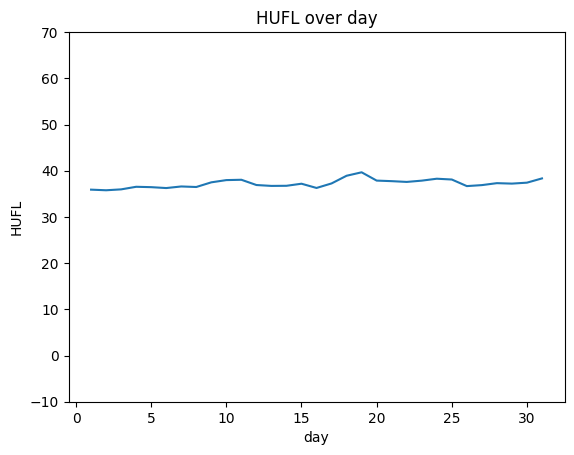

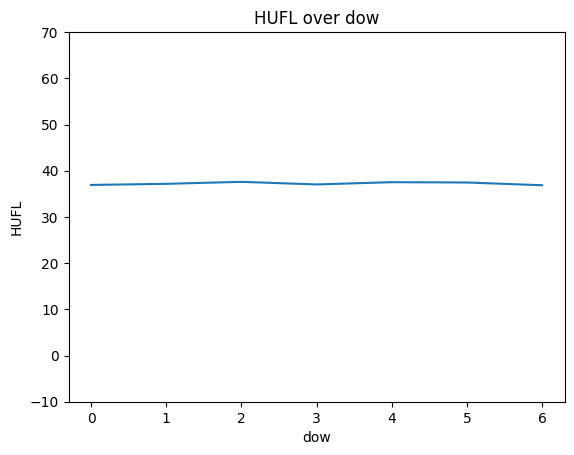

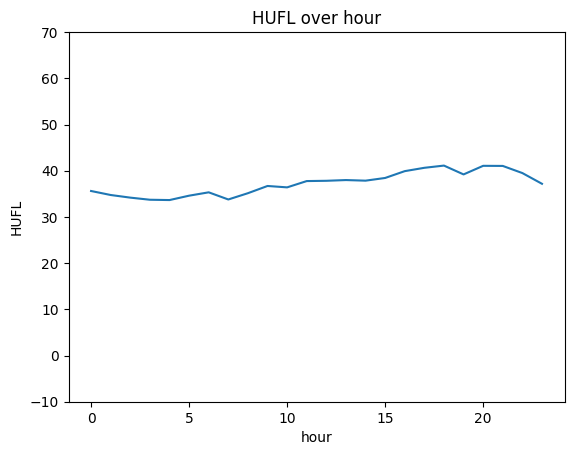

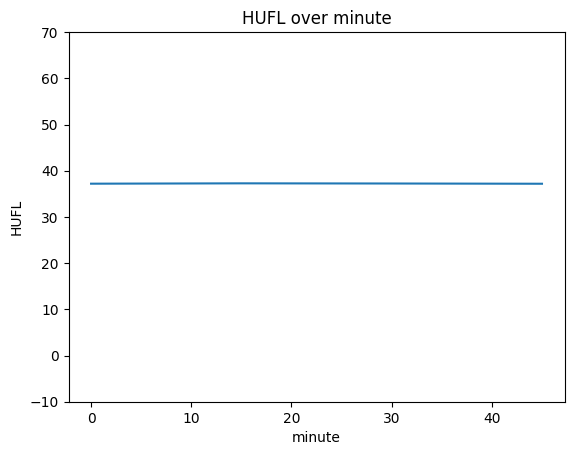

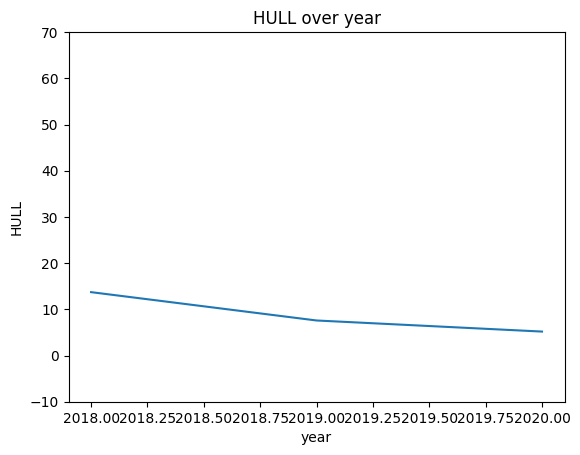

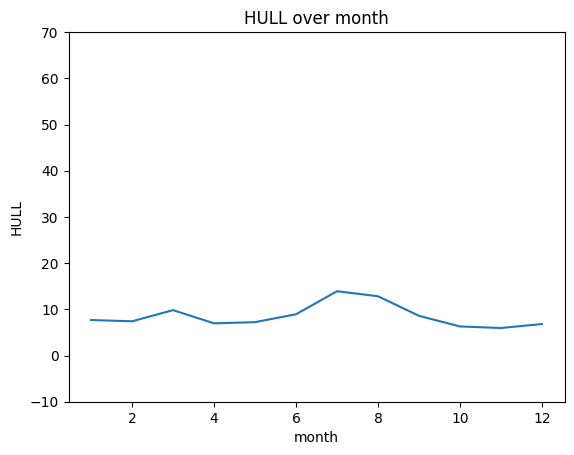

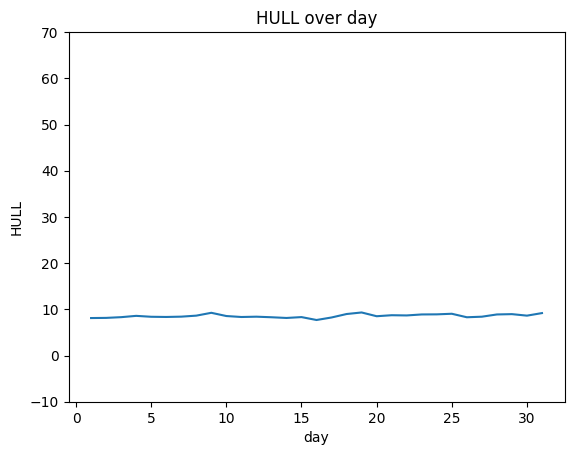

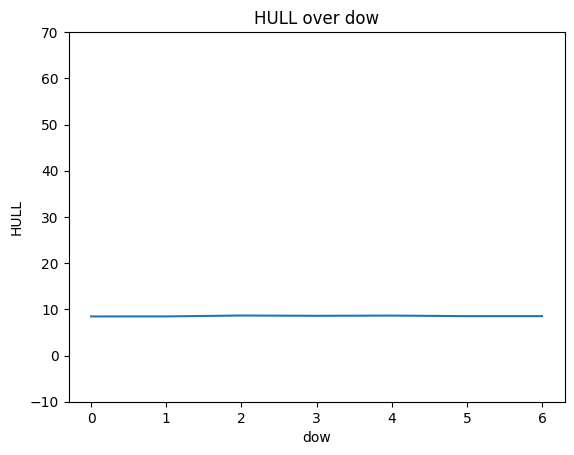

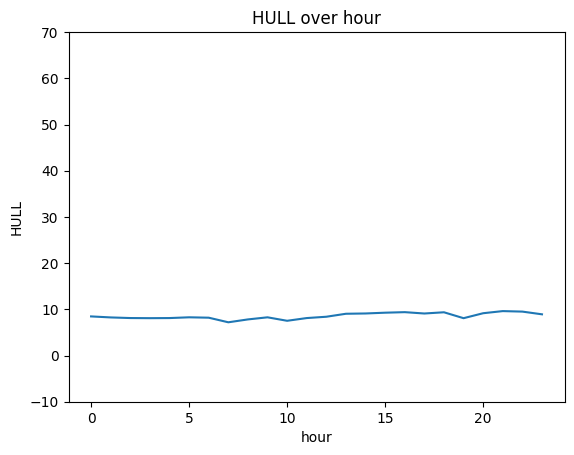

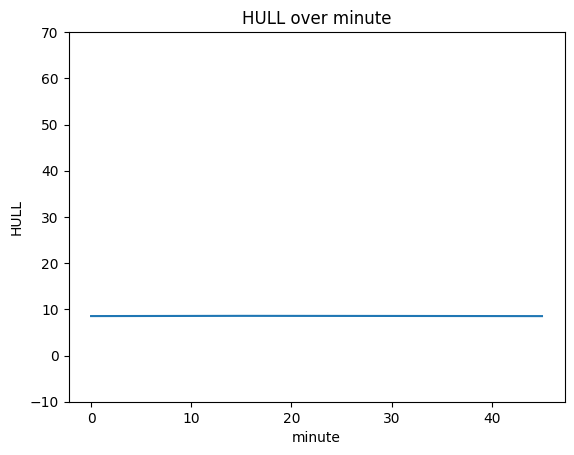

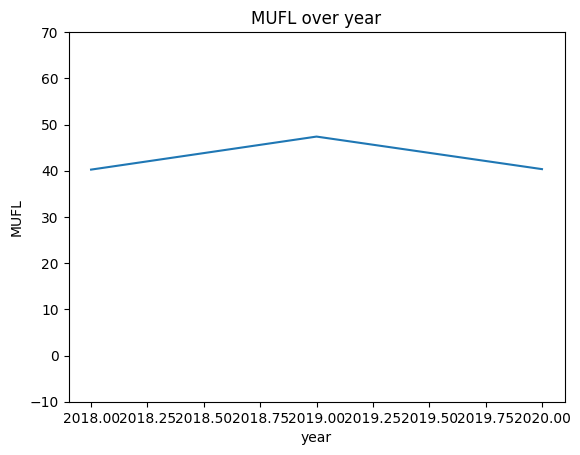

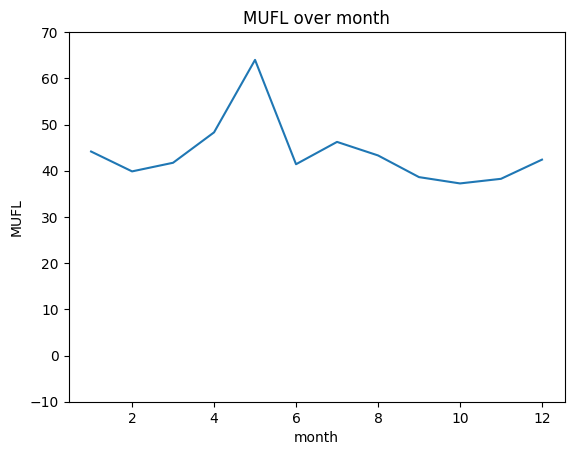

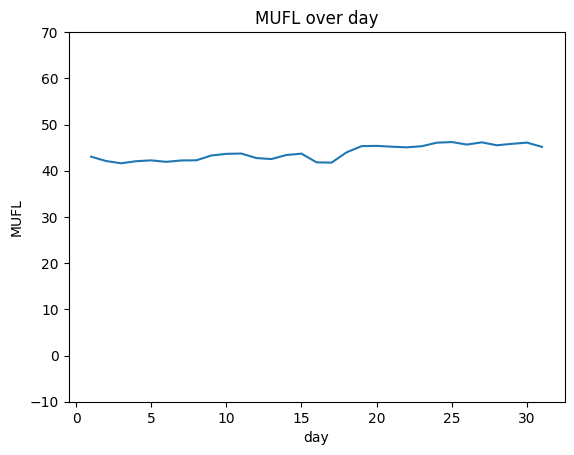

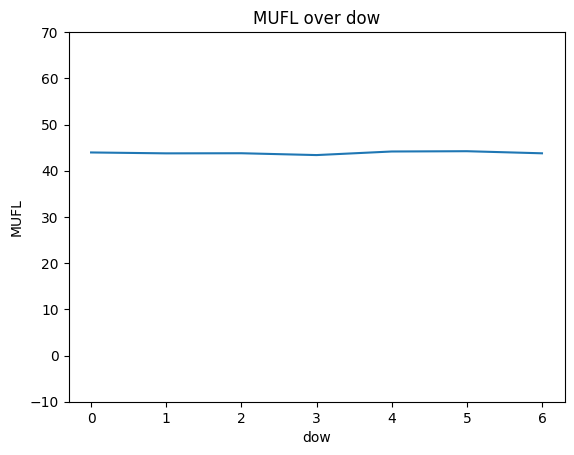

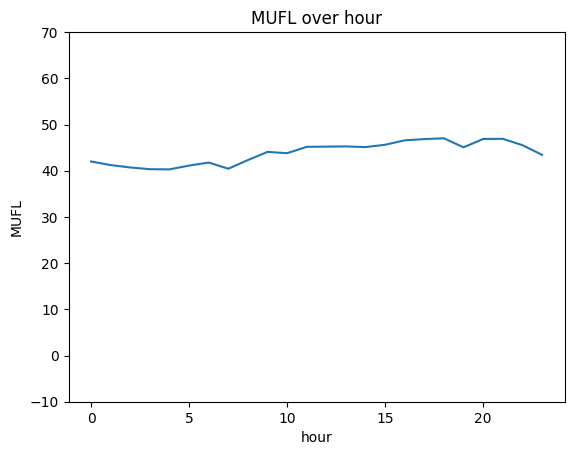

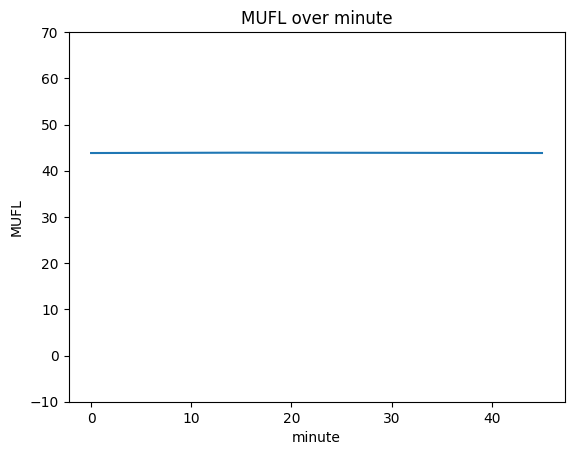

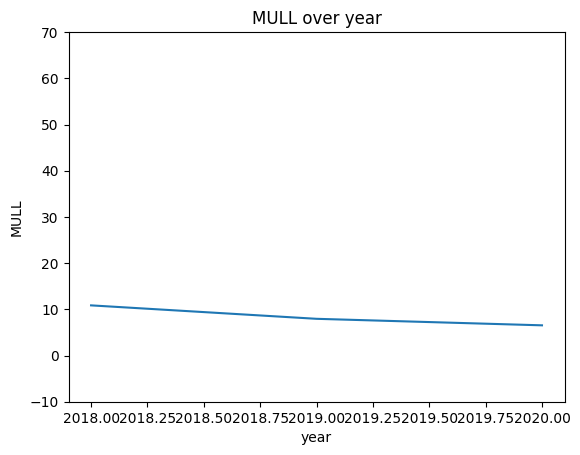

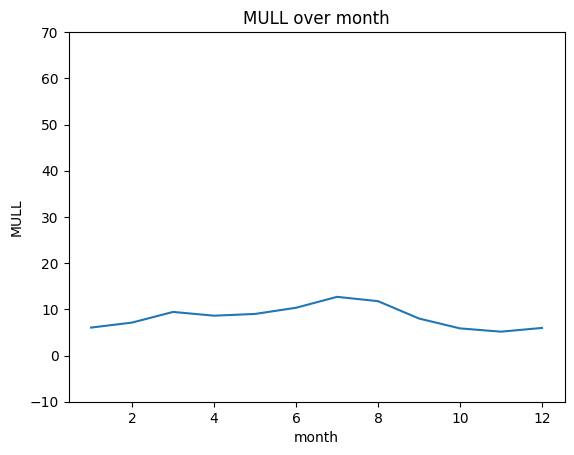

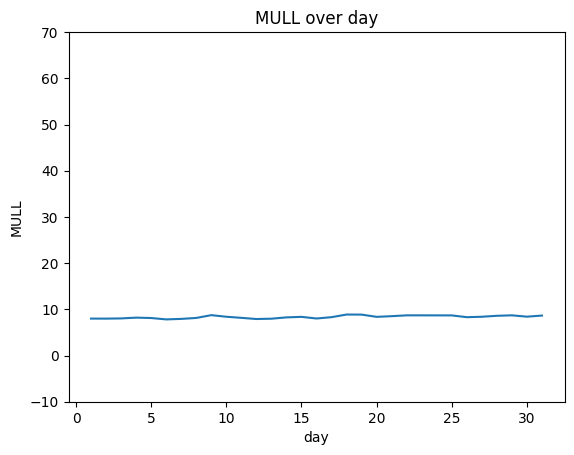

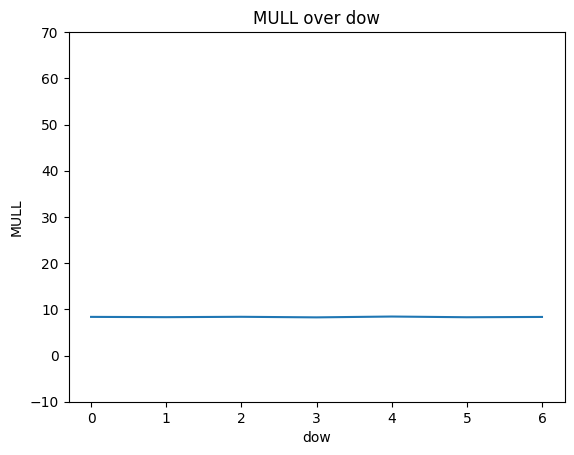

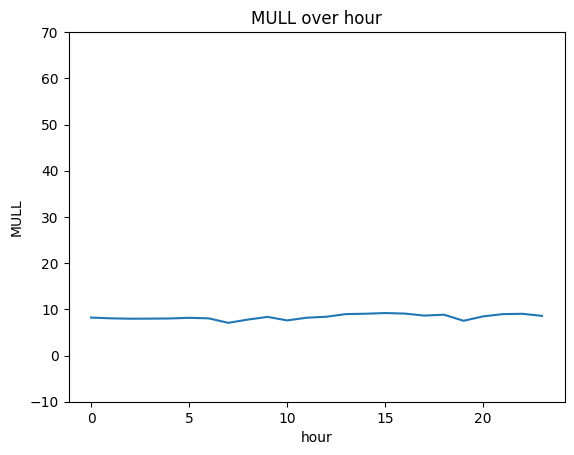

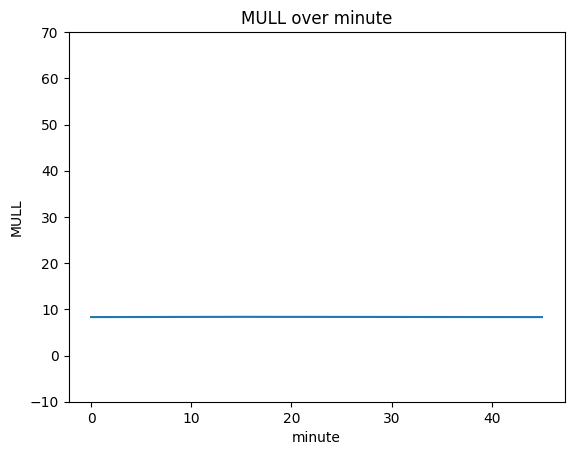

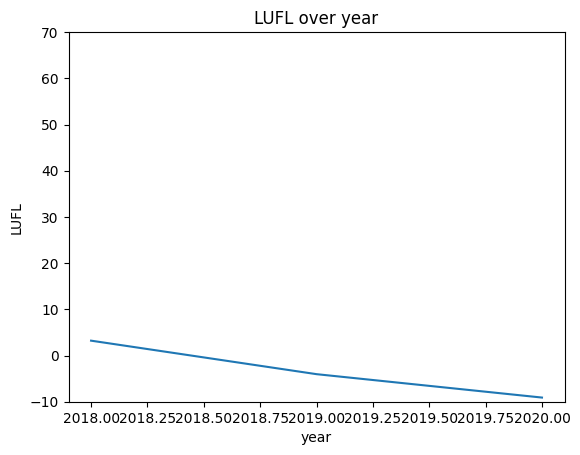

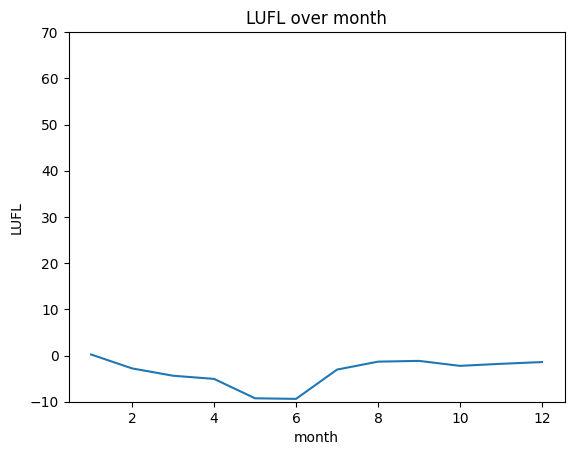

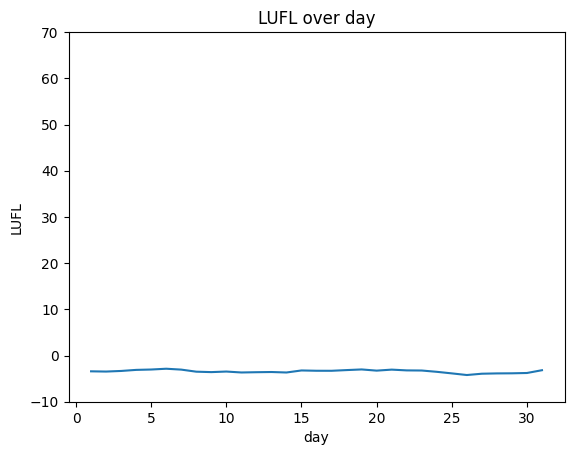

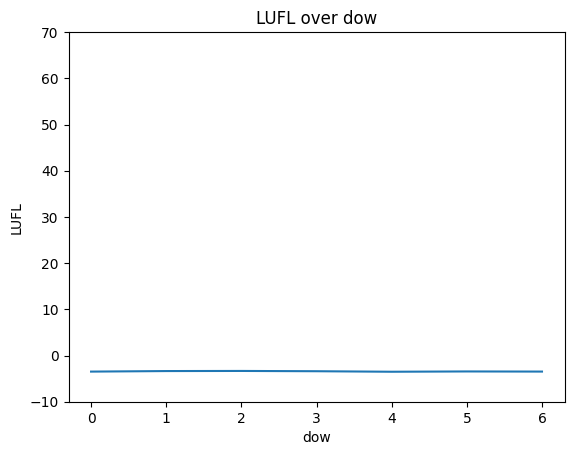

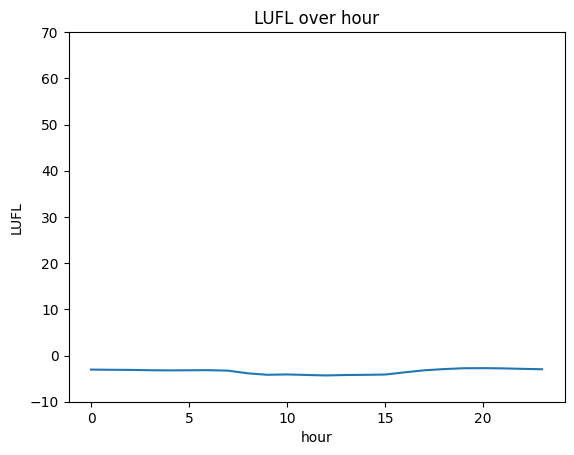

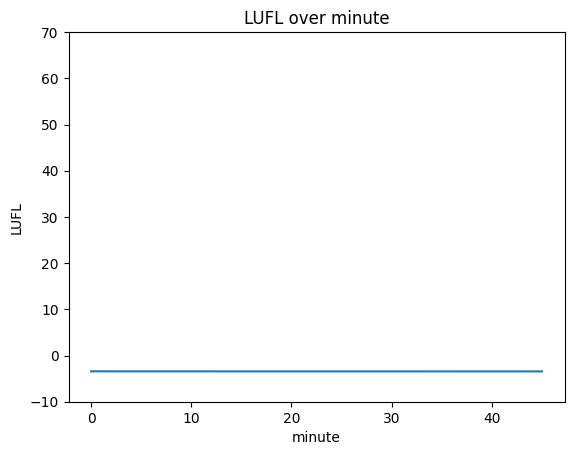

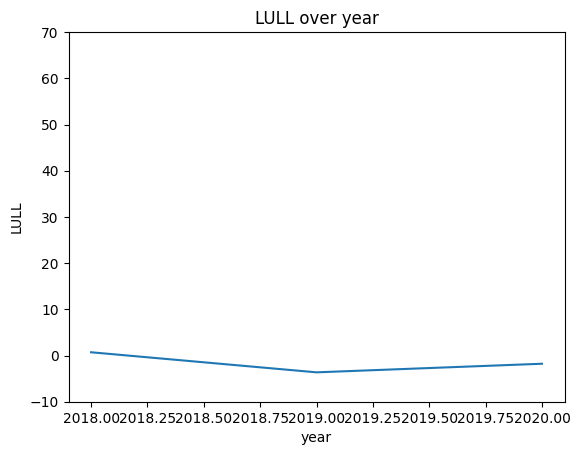

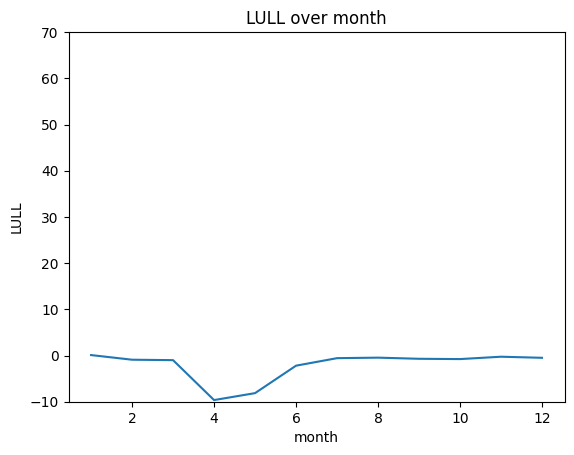

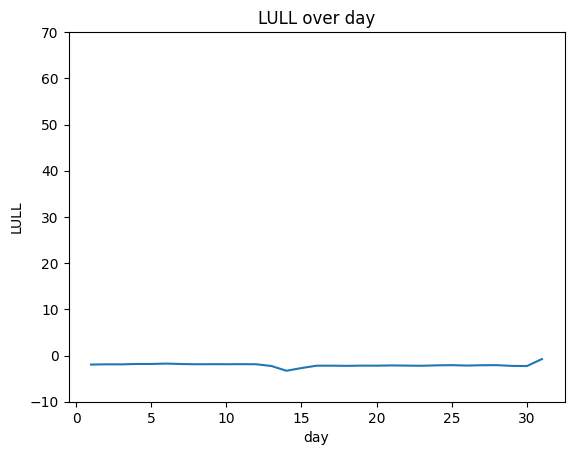

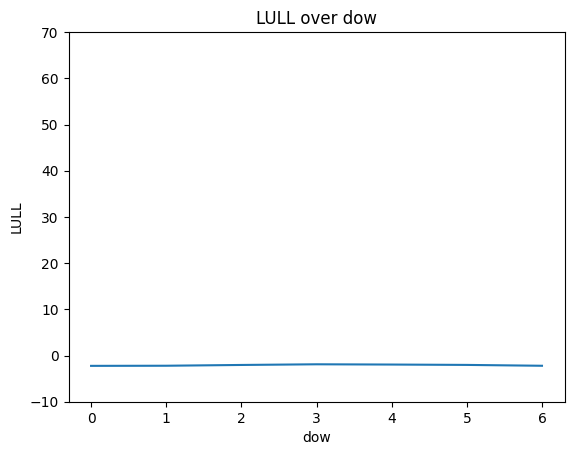

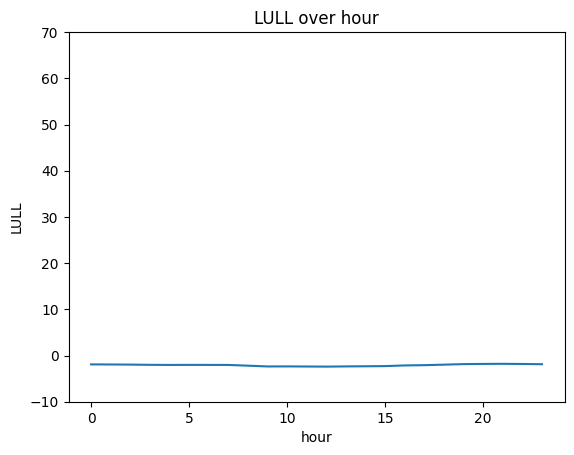

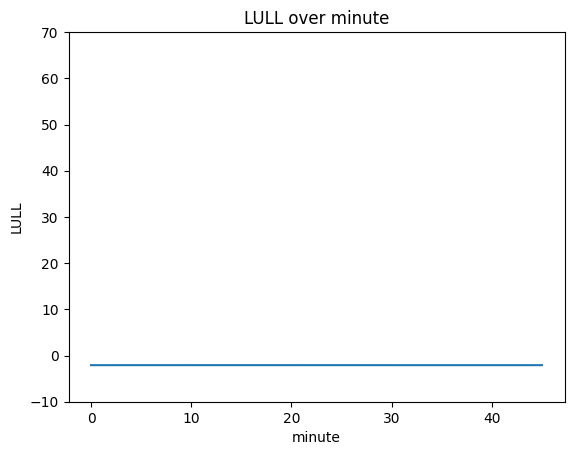

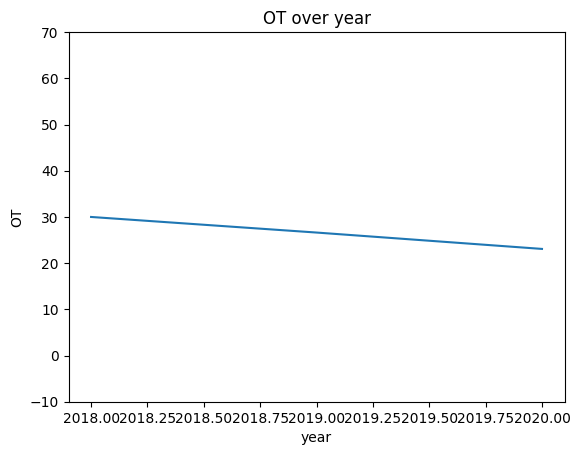

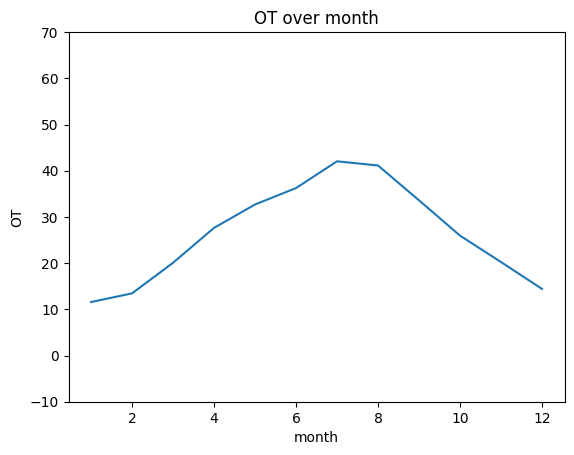

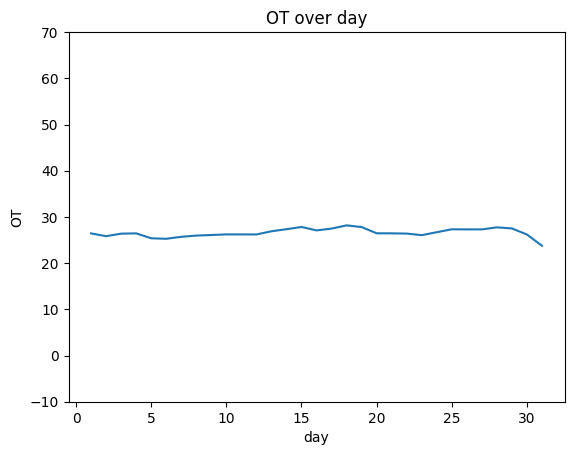

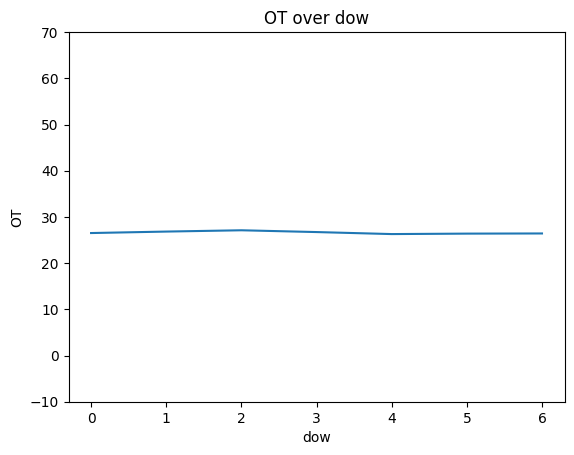

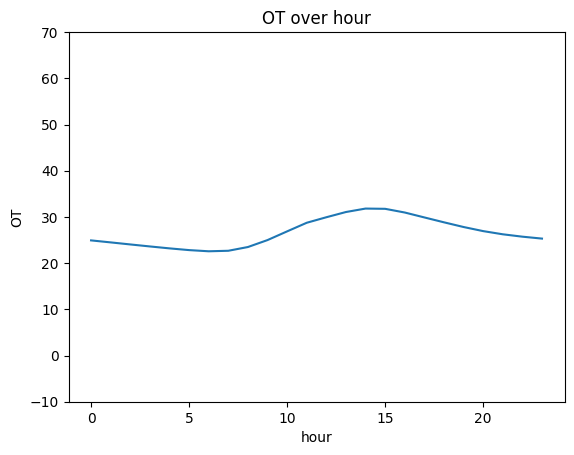

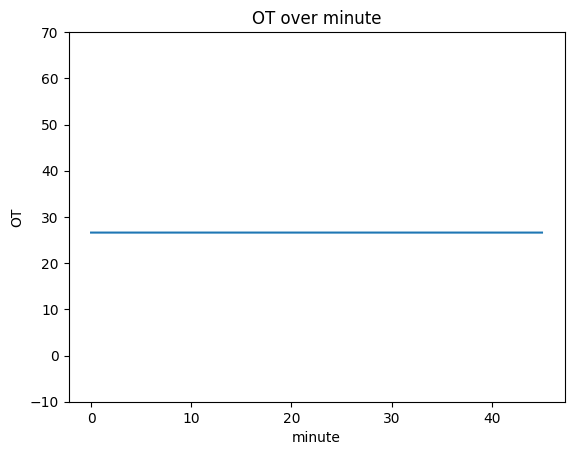

In [13]:
for col in columns:
    for time_col in time_columns:
        df2.groupby(time_col)[col].mean().plot(kind="line", ylim=(-10, 70), title=f"{col} over {time_col}", ylabel=col)
        plt.show()